In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

# NE

In [3]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 359
cc = 'NE'
extreme_threshold = -1

# Extreme Threshold = -1

In [4]:
naive = np.load("../../whole_data_results/ET_orac/Naive_mean.npy")

In [9]:
enso = np.zeros((12,29))
base = np.zeros((12,29))
tsa = np.zeros((12,29))

SST_corr = np.zeros((12,29))
SST_pcmci = np.zeros((12,29))

#SOIL_corr = np.zeros((12,29))
#SOIL_pcmci = np.zeros((12,29))

#hybrid_corr = np.zeros((12,29))
#hybrid_pcmci = np.zeros((12,29))


for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/{}/enso_{}/model_{}_{}_{}_{}_{}.npy".format(cc,abs(extreme_threshold),f,step,test_start,test_end,tau))
    tsa[tau-1,] = np.load("../../whole_data_results/{}/tna_{}/model_{}_{}_{}_{}_{}.npy".format(cc,abs(extreme_threshold),f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/{}/pcmci_{}/base_{}_{}_{}_{}_{}.npy".format(cc,abs(extreme_threshold),f,step,test_start,test_end,tau))
    
    
    SST_corr[tau-1,] = np.load("../../whole_data_results/{}/corr_{}/model_{}_{}_{}_{}_{}.npy".format(cc,abs(extreme_threshold),f,step,test_start,test_end,tau))
    SST_pcmci[tau-1,] = np.load("../../whole_data_results/{}/pcmci_{}/model_{}_{}_{}_{}_{}.npy".format(cc,abs(extreme_threshold),f,step,test_start,test_end,tau))   
    
    #SOIL_corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil_1/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #SOIL_pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil_1/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    
    #hybrid_corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_hybrid_1/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #hybrid_pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_hybrid_1/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.03, 0.5)

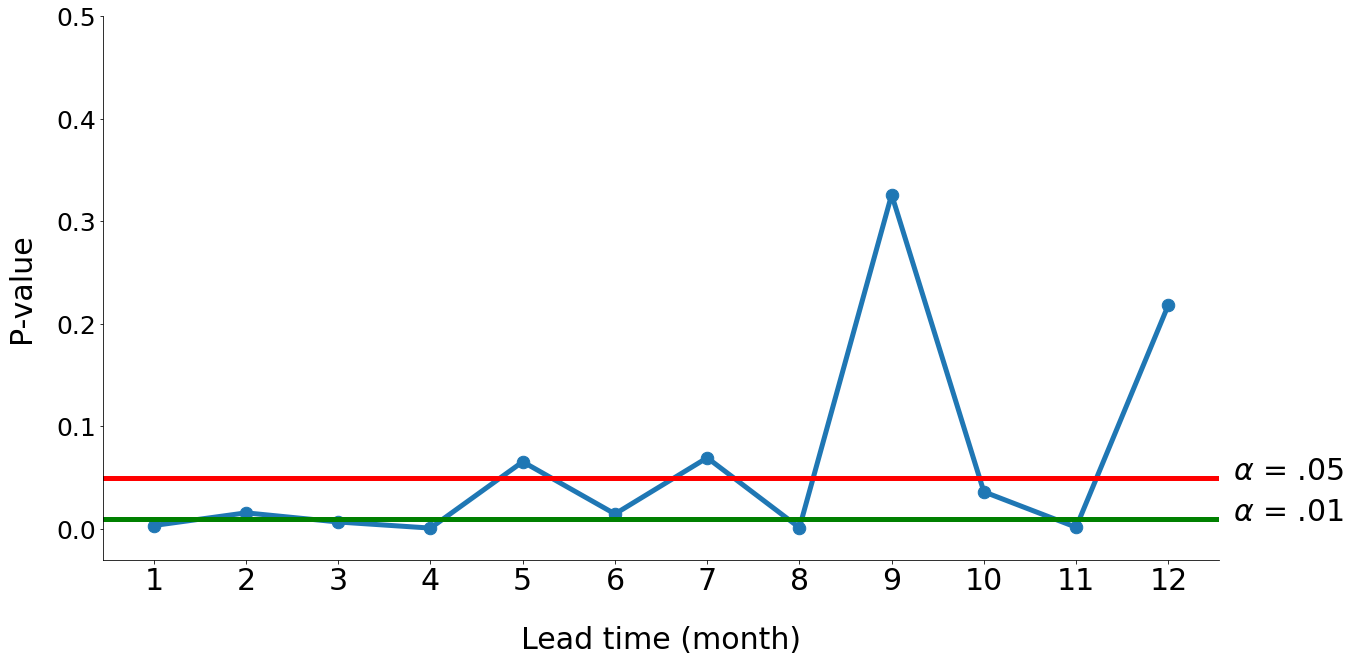

In [10]:
p_values = []
for i in range(12):
    d = tsa[i,:] - SST_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
#    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'g',linewidth = 5)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-0.03,0.5])
#plt.title("ENSO VS SST PCMCI", fontsize = 25)
#plt.savefig("SST_p_pcmci_NE.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.03, 0.3)

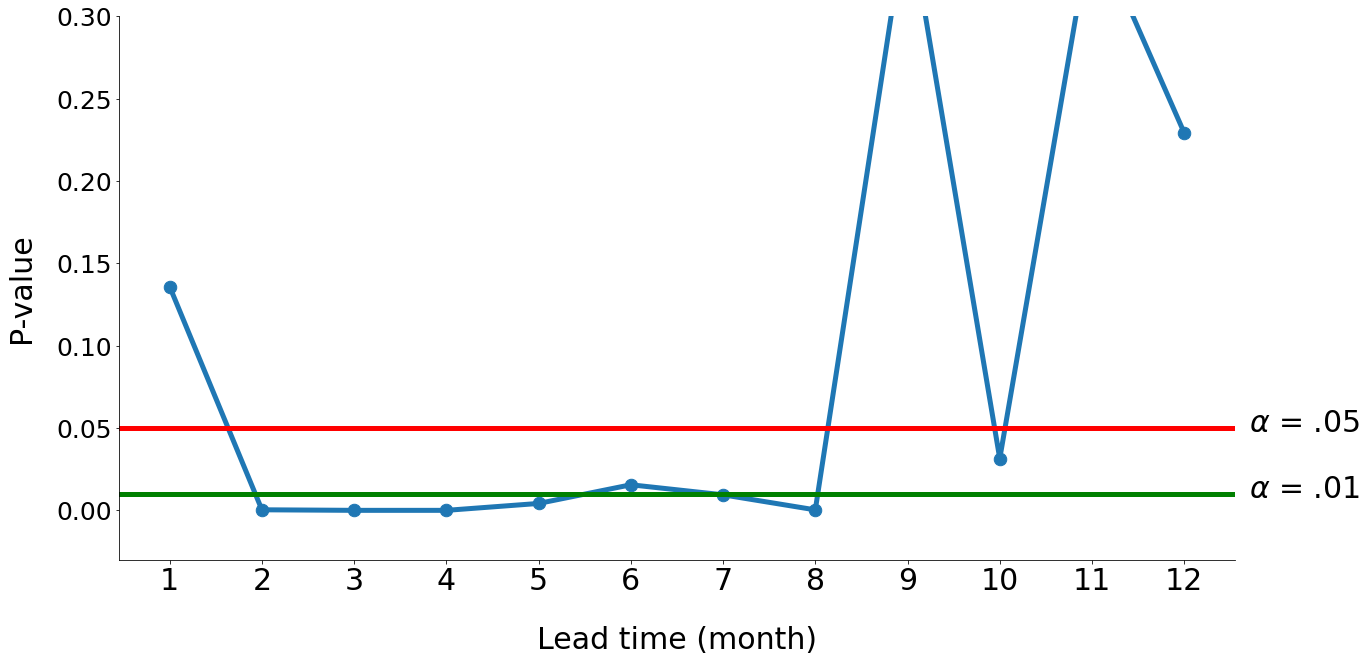

In [8]:
p_values = []
for i in range(12):
    d = tsa[i,:] - SST_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.axhline(0.01, color = 'g',linewidth = 5)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
plt.text(12.7, 0.008, r'$\alpha$ = .01', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-0.03,0.3])
#plt.title("ENSO VS SST PCMCI", fontsize = 25)
#plt.savefig("SST_p_corr_NE.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.03, 0.1)

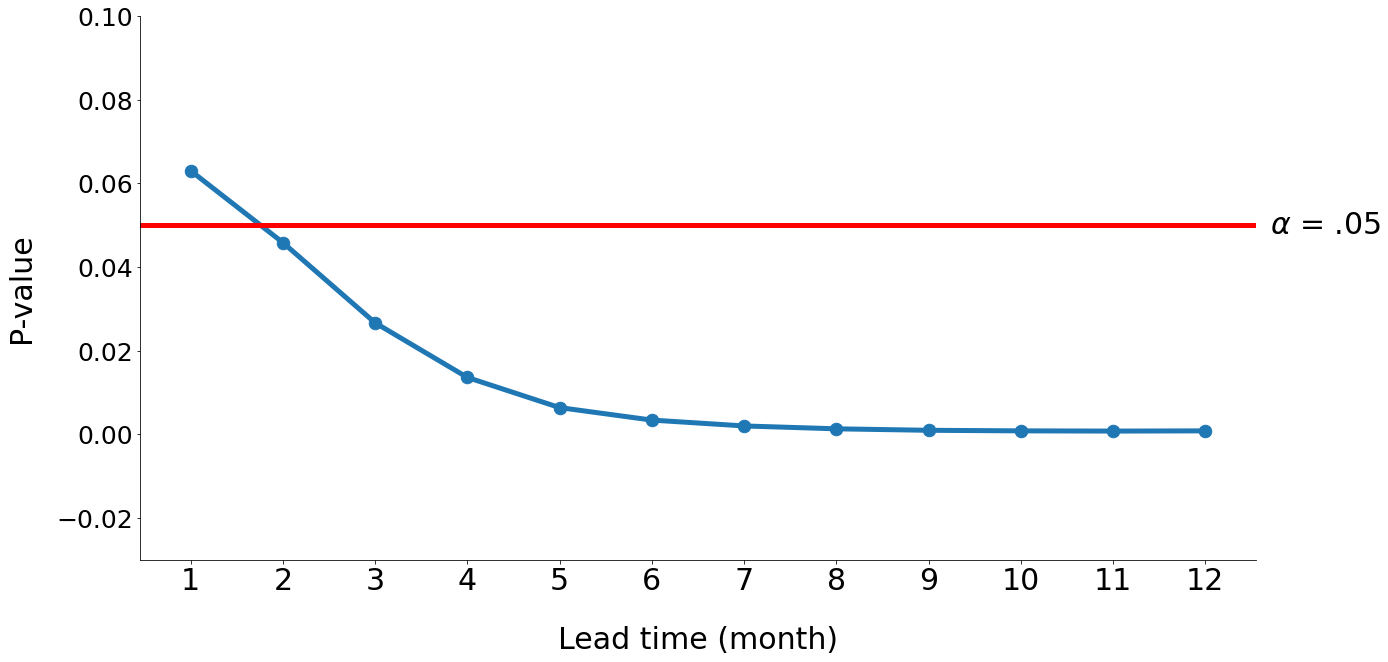

In [39]:
p_values = []
for i in range(12):
    d = naive[i,:] - SOIL_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-0.03,0.1])
#plt.title("ENSO VS SST PCMCI", fontsize = 25)
#plt.savefig("SOIL_p_pcmci.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


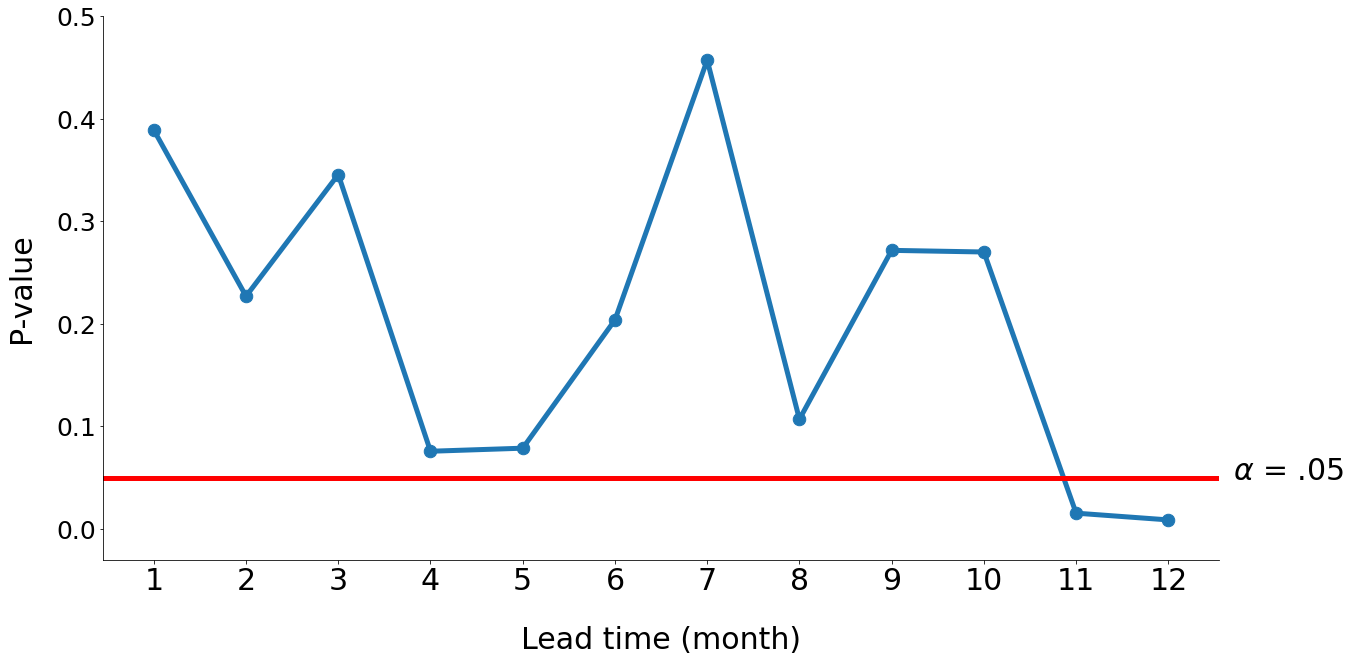

In [9]:
p_values = []
for i in range(12):
    d = enso[i,:] - SOIL_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 5)
plt.axhline(0.05, color = 'r',linewidth = 5)
plt.xlabel("Lead time (month)", fontsize = 30,labelpad = 30)
plt.ylabel("P-value", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 25)
plt.xticks(x, fontsize = 30);
plt.text(12.7, 0.048, r'$\alpha$ = .05', fontsize=30)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
axes = plt.gca()
axes.set_ylim([-0.03,0.5])
#plt.title("ENSO VS SST PCMCI", fontsize = 25)
plt.savefig("SOIL_p_corr.png");

Text(0.5, 1.0, 'ENSO VS HYBRID PCMCI')

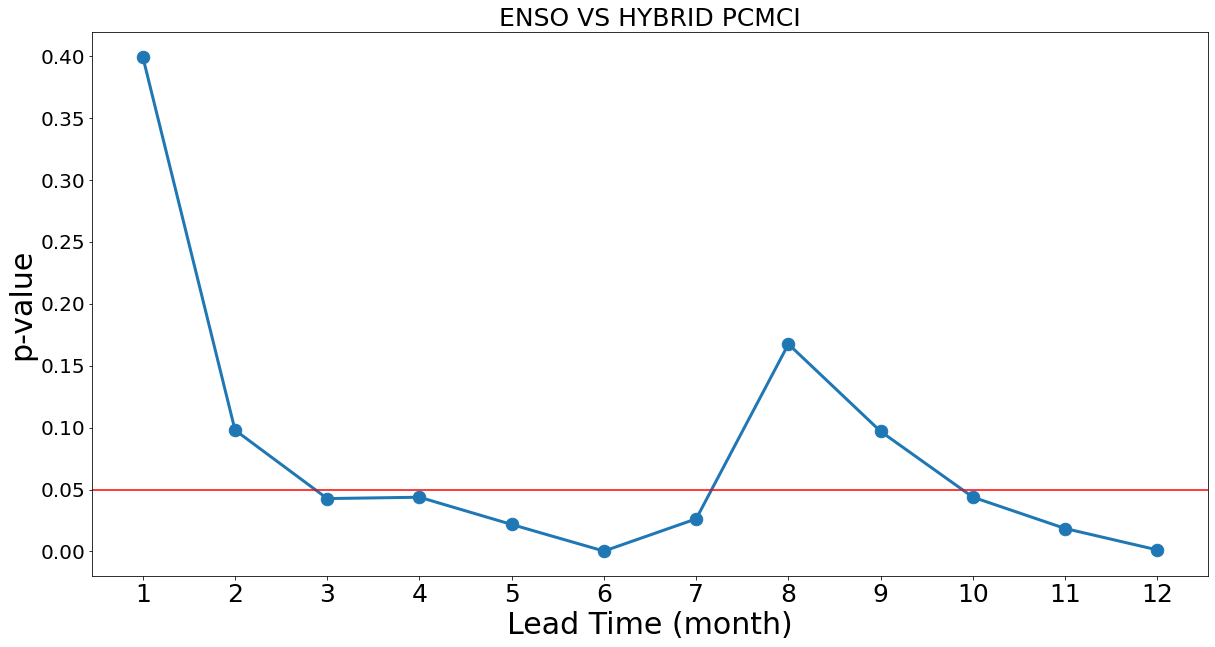

In [62]:
p_values = []
for i in range(12):
    d = enso[i,:] - hybrid_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO VS HYBRID PCMCI", fontsize = 25)
#plt.savefig("p_pcmci.png");    

Text(0.5, 1.0, 'ENSO VS HYBRID CORR')

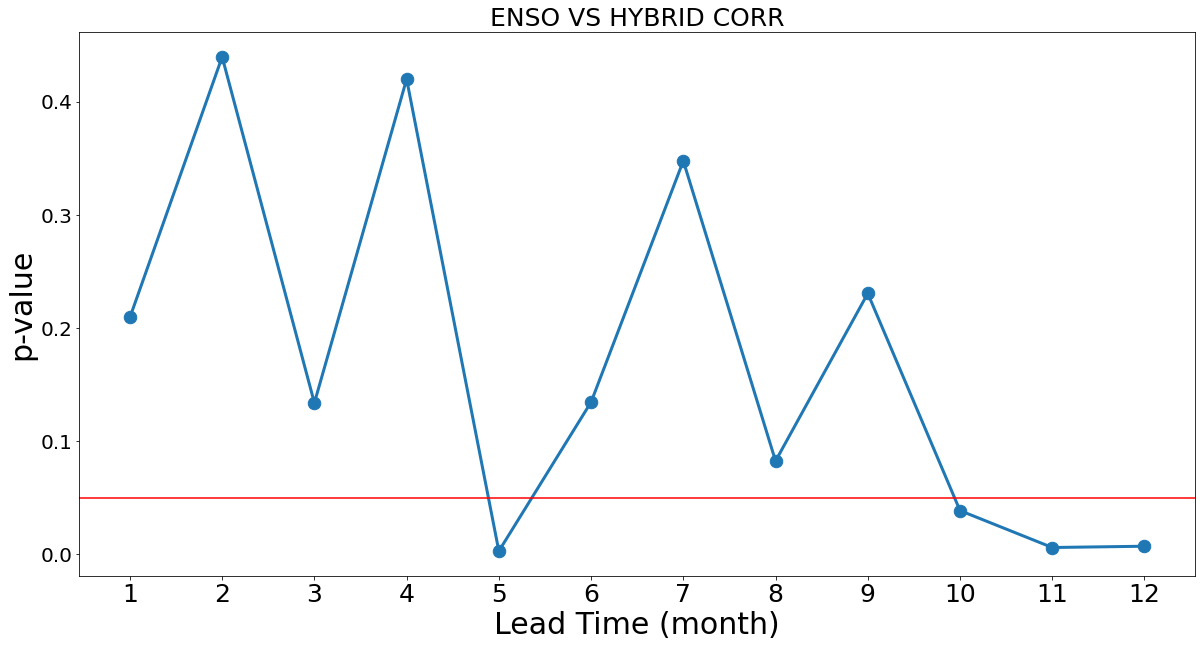

In [63]:
p_values = []
for i in range(12):
    d = enso[i,:] - hybrid_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO VS HYBRID CORR", fontsize = 25)
#plt.savefig("p_pcmci.png");    

In [30]:
enso1 - SST_pcmci1

array([-1.34446027, -0.24199051,  4.2905317 ,  5.50281215,  3.10192288,
        0.23258552,  1.10290733,  2.28902066,  4.26723018,  2.91438685,
       -0.55217236,  2.47009955,  1.04356888,  0.31405763,  1.72156222,
        1.23866017,  3.16127945,  1.37527994,  0.24499821,  2.56048616,
        2.22337917,  0.7337451 , -0.35720585,  0.53167993, -0.40695902,
       -0.53900806,  1.61481873,  0.94937876,  1.89805524])

In [29]:
enso1

array([16.10694168,  9.34414254, 14.97291876, 17.84390544, 16.33038027,
       13.95426623, 13.13583346, 15.99531228, 12.91755272, 10.62545512,
        9.15776921, 12.13578613, 11.6859521 , 11.35416663, 13.69649349,
       14.44733621, 16.70721087, 13.32815785, 10.27648371,  7.6601383 ,
       10.26207245,  9.88829037, 11.44279841, 10.96391756, 11.31625154,
       11.04377091, 12.21829804, 15.63967676, 16.38809366])

In [43]:
np.median(SST_pcmci1)

11.582778971345359

In [42]:
np.median(SST_corr1)

11.925505172487677

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


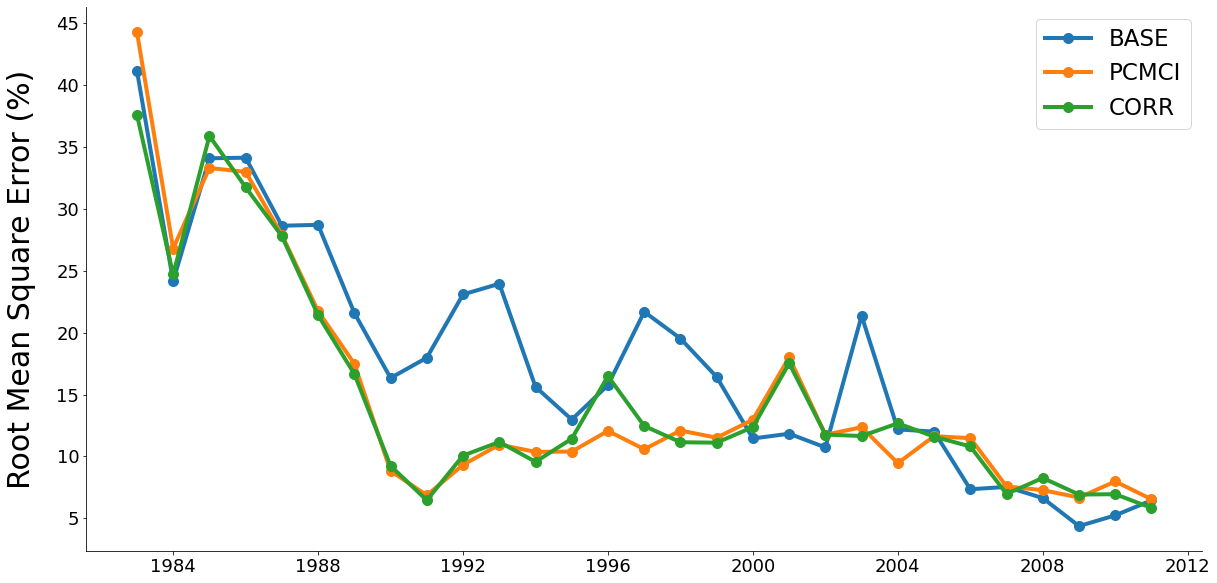

In [41]:
tau = 12

amo1 = 100*np.sqrt(amo[tau-1,:])/N
#naive1 = 100*np.sqrt(naive[tau-1,:])/N

SST_pcmci1 = 100*np.sqrt(SST_pcmci[tau-1,:])/N
SST_corr1 = 100*np.sqrt(SST_corr[tau-1,:])/N

#hybrid_pcmci1 = 100*np.sqrt(hybrid_pcmci[tau-1,:])/N
#hybrid_corr1 = 100*np.sqrt(hybrid_corr[tau-1,:])/N

#SOIL_pcmci1 = 100*np.sqrt(SOIL_pcmci[tau-1,:])/N
#SOIL_corr1 = 100*np.sqrt(SOIL_corr[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,amo1, label = 'BASE', marker=".", markersize=20,linewidth = 4)
#plt.plot(x,naive1, label = 'NAIVE', marker=".", markersize=20,linewidth = 4)

plt.plot(x,SST_pcmci1, label = 'PCMCI', marker=".", markersize=20,linewidth = 4)
plt.plot(x,SST_corr1, label = 'CORR', marker=".", markersize=20,linewidth = 4)

#plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 3)

#plt.plot(x,hybrid_corr1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,hybrid_pcmci1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel("Root Mean Square Error (%)", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 23)

#plt.savefig("result{}SSTNE.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


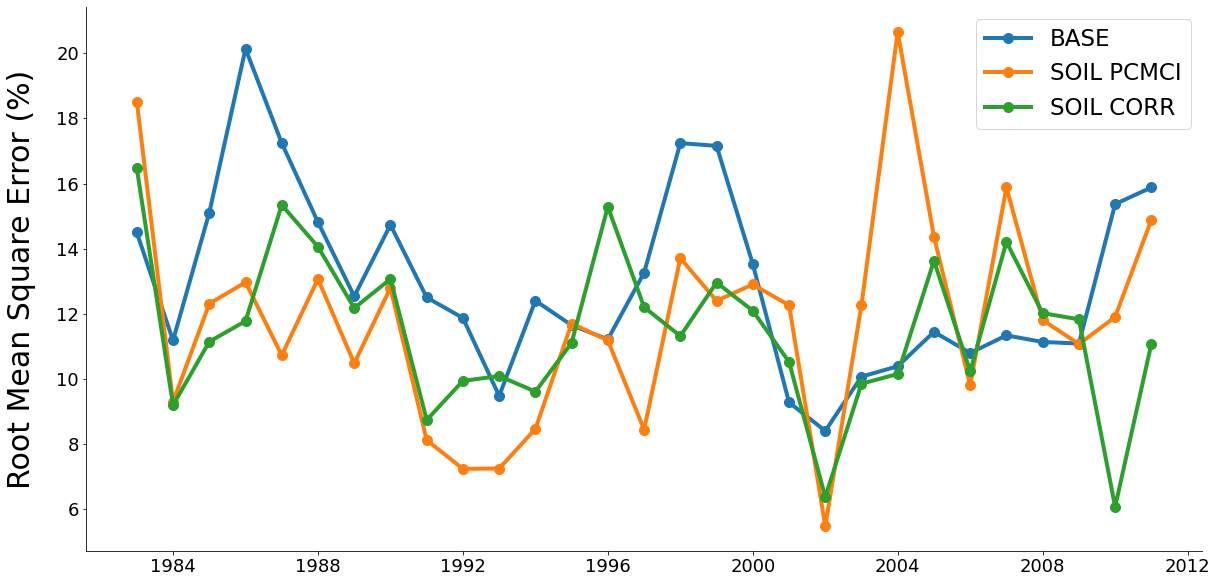

In [17]:
tau = 12

enso1 = 100*np.sqrt(enso[tau-1,:])/N

SST_pcmci1 = 100*np.sqrt(SST_pcmci[tau-1,:])/N
SST_corr1 = 100*np.sqrt(SST_corr[tau-1,:])/N

hybrid_pcmci1 = 100*np.sqrt(hybrid_pcmci[tau-1,:])/N
hybrid_corr1 = 100*np.sqrt(hybrid_corr[tau-1,:])/N

SOIL_pcmci1 = 100*np.sqrt(SOIL_pcmci[tau-1,:])/N
SOIL_corr1 = 100*np.sqrt(SOIL_corr[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'BASE', marker=".", markersize=20,linewidth = 4)

plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 4)
plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 4)

#plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 3)

#plt.plot(x,hybrid_corr1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,hybrid_pcmci1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel("Root Mean Square Error (%)", fontsize = 30,labelpad = 20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 23)

plt.savefig("result{}SOIL.png".format(tau));

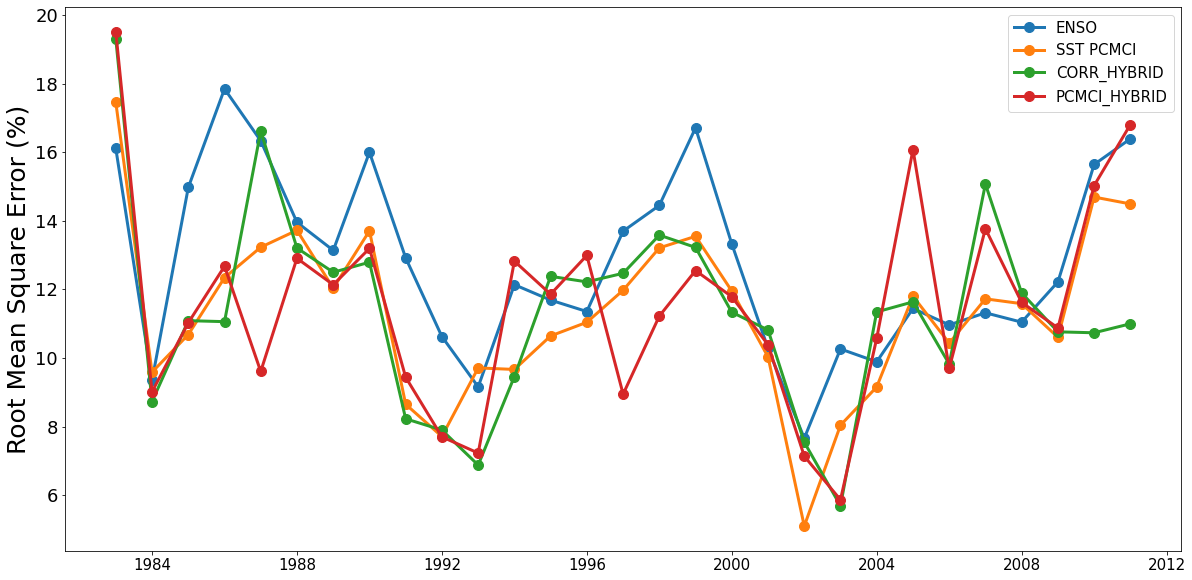

In [73]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'ENSO', marker=".", markersize=20,linewidth = 3)

plt.plot(x,SST_pcmci1, label = 'SST PCMCI', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,SST_corr1, label = 'SST CORR', marker=".", markersize=20,linewidth = 3)

#plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 3)

plt.plot(x,hybrid_corr1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
plt.plot(x,hybrid_pcmci1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)

plt.ylabel("Root Mean Square Error (%)", fontsize = 25)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
#plt.savefig("TAUexample.png");

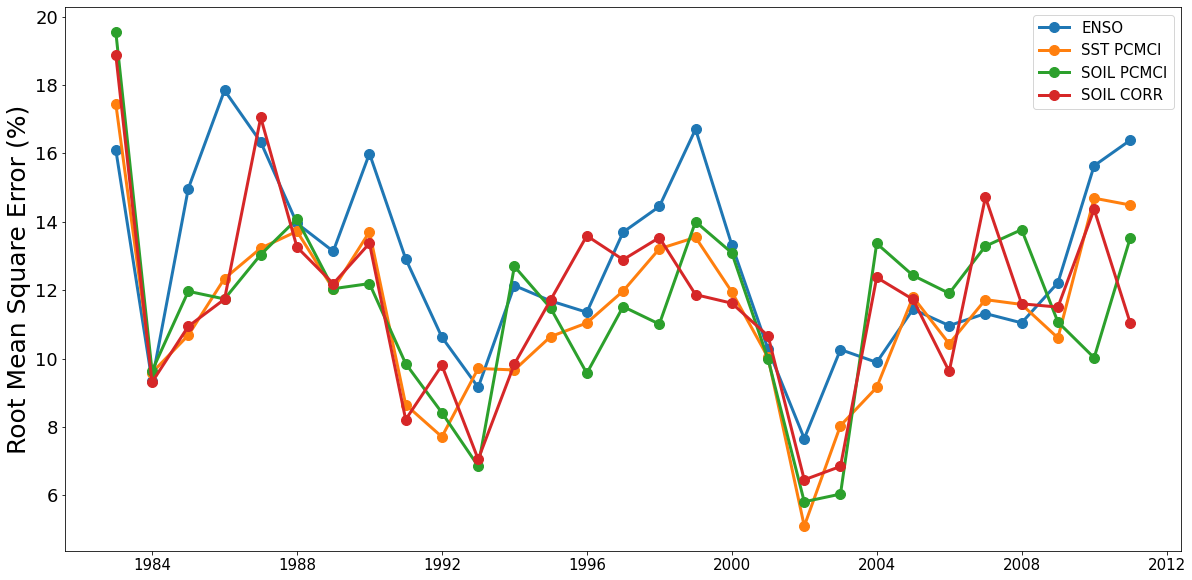

In [74]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'ENSO', marker=".", markersize=20,linewidth = 3)

plt.plot(x,SST_pcmci1, label = 'SST PCMCI', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,SST_corr1, label = 'SST CORR', marker=".", markersize=20,linewidth = 3)

plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 3)
plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 3)

#plt.plot(x,hybrid_corr1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,hybrid_pcmci1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)

plt.ylabel("Root Mean Square Error (%)", fontsize = 25)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
#plt.savefig("TAUexample.png");

# Extreme Threshold = -2

In [10]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 371

In [11]:
enso = np.zeros((12,29))
base = np.zeros((12,29))

SST_pcmci = np.zeros((12,29))
SST_corr = np.zeros((12,29))

SOIL_pcmci = np.zeros((12,29))
SOIL_corr = np.zeros((12,29))

hybrid_corr = np.zeros((12,29))

for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    
    SST_pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    SST_corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    
    SOIL_pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    SOIL_corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    
    hybrid_corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_hybrid_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    

Text(0.5, 1.0, 'ENSO - SST PCMCI')

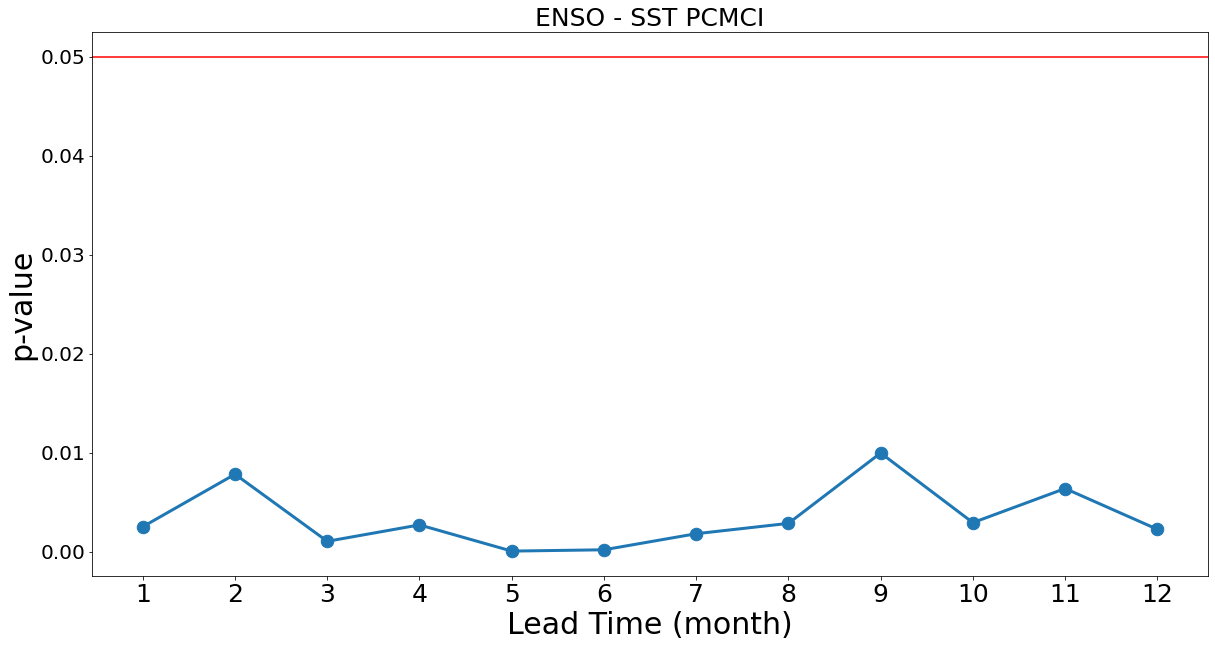

In [12]:
p_values = []
for i in range(12):
    d = enso[i,:] - SST_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO - SST PCMCI", fontsize = 25)
#plt.savefig("p_pcmci.png");    

Text(0.5, 1.0, 'ENSO - SST CORR')

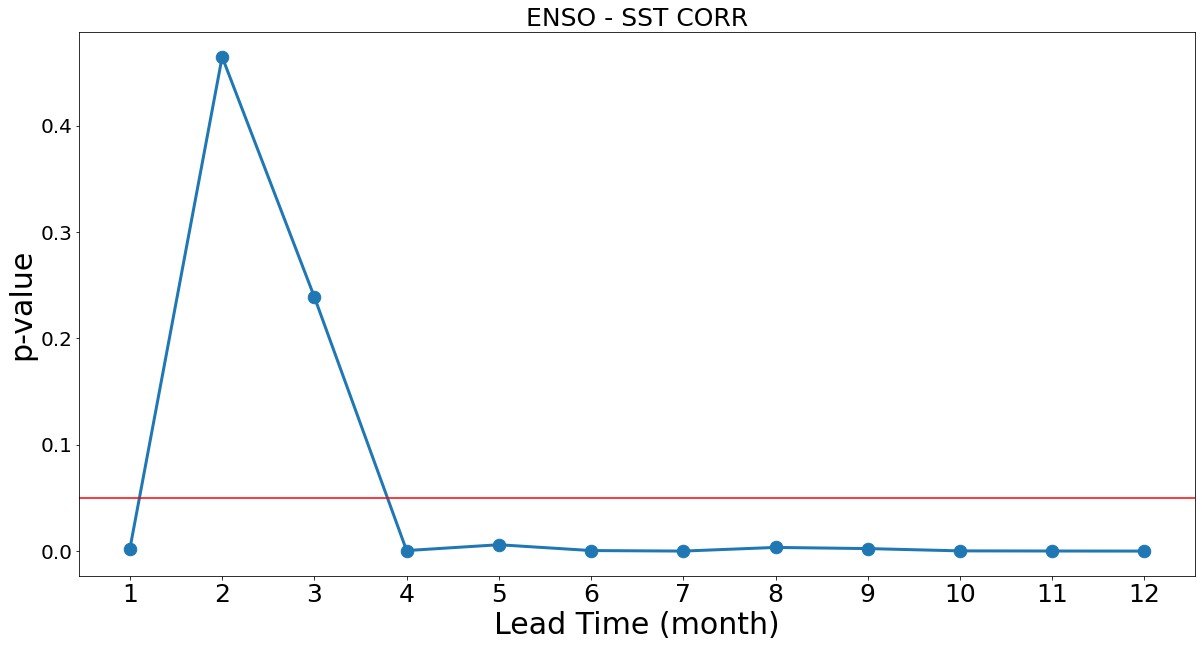

In [13]:
p_values = []
for i in range(12):
    d = base[i,:] - SST_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO - SST CORR", fontsize = 25)
#plt.savefig("p_pcmci.png");    

Text(0.5, 1.0, 'ENSO - SOIL PCMCI')

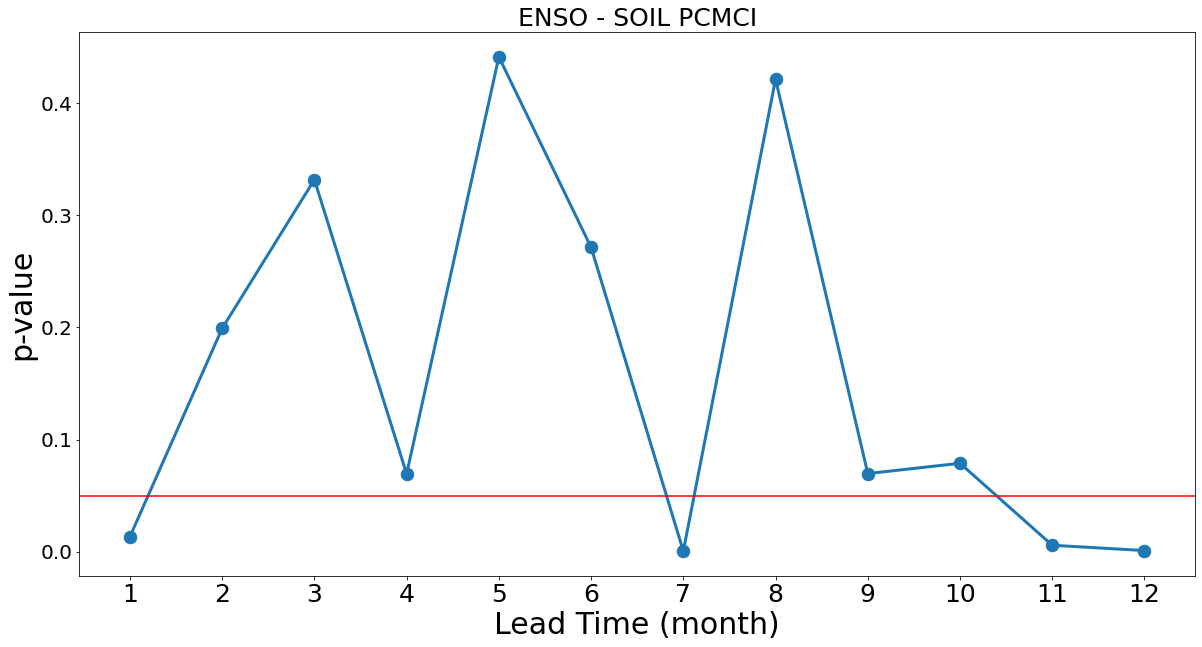

In [8]:
p_values = []
for i in range(12):
    d = base[i,:] - SOIL_pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO - SOIL PCMCI", fontsize = 25)
#plt.savefig("p_pcmci.png");   

Text(0.5, 1.0, 'ENSO - SOIL CORR')

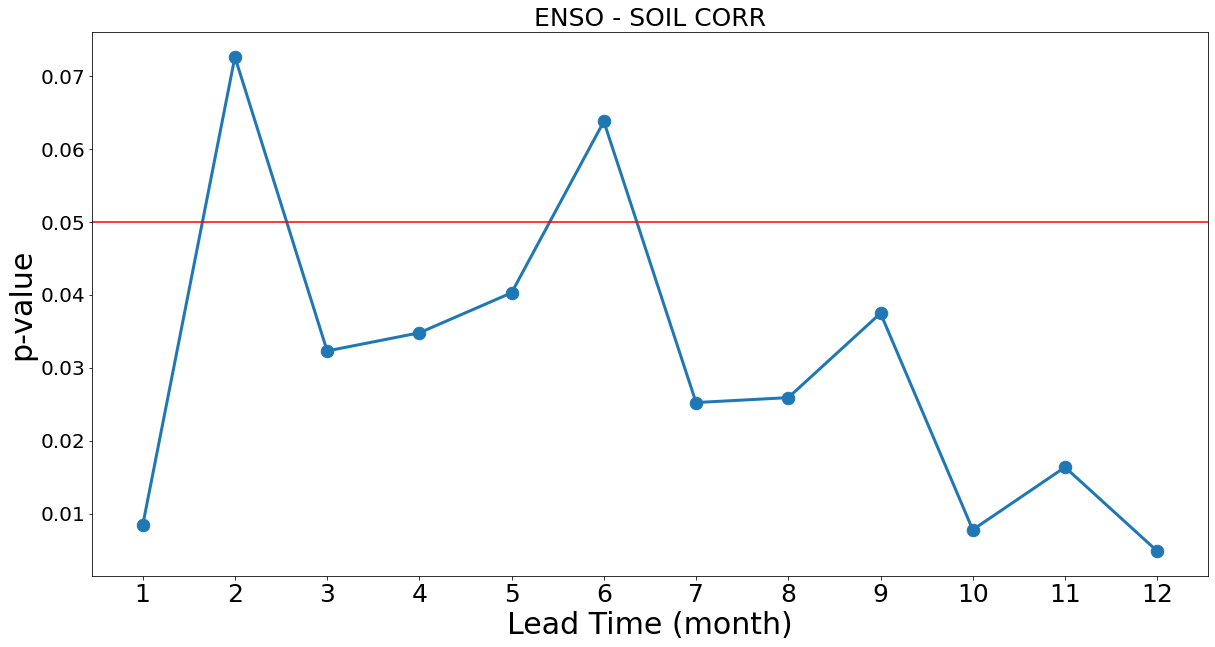

In [9]:
p_values = []
for i in range(12):
    d = enso[i,:] - SOIL_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO - SOIL CORR", fontsize = 25)
#plt.savefig("p_pcmci.png");    

Text(0.5, 1.0, 'ENSO - HYBRID CORR')

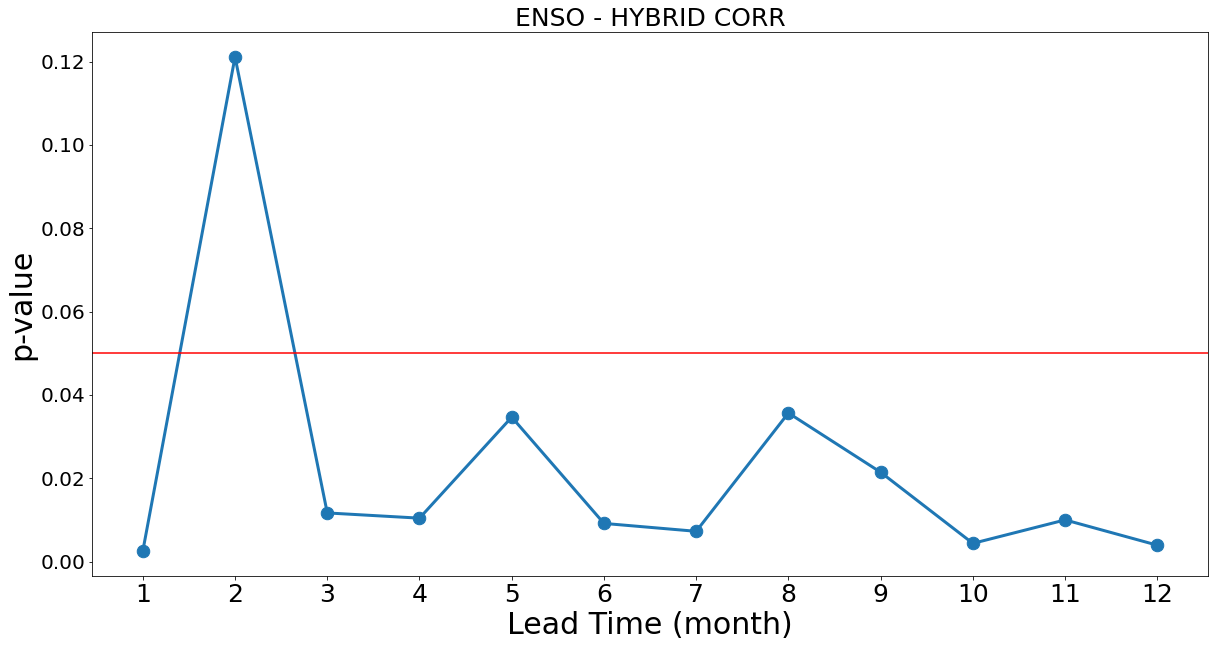

In [80]:
p_values = []
for i in range(12):
    d = enso[i,:] - hybrid_corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    #print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

    x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
plt.title("ENSO - HYBRID CORR", fontsize = 25)
#plt.savefig("p_pcmci.png");    

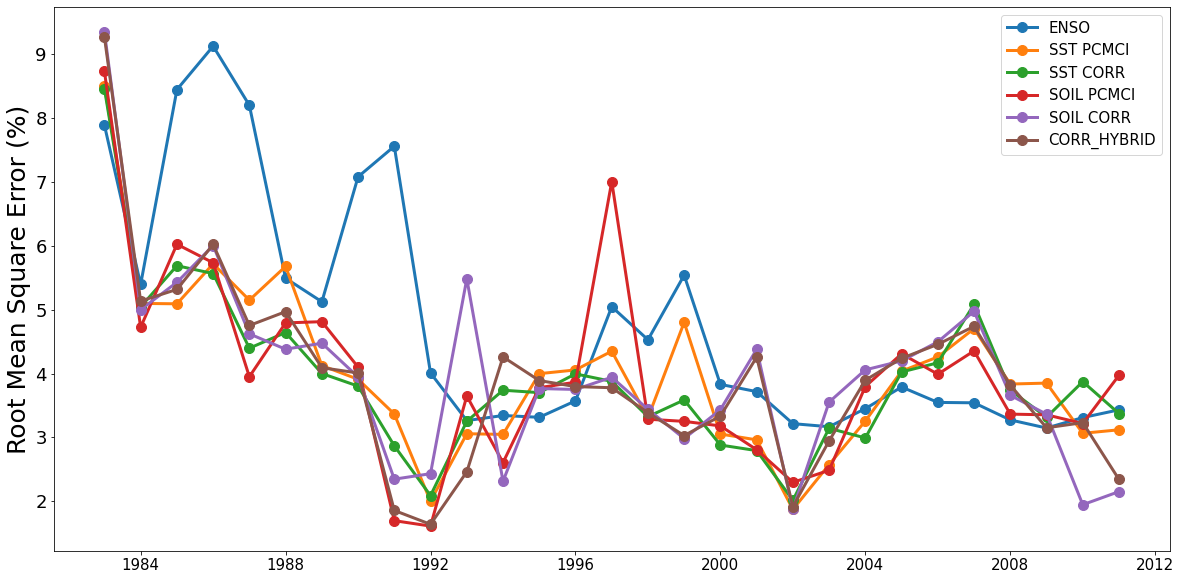

In [81]:
tau = 11

enso1 = 100*np.sqrt(enso[tau-1,:])/N

SST_pcmci1 = 100*np.sqrt(SST_pcmci[tau-1,:])/N
SST_corr1 = 100*np.sqrt(SST_corr[tau-1,:])/N

#hybrid_pcmci1 = 100*np.sqrt(hybrid_pcmci[tau-1,:])/N
hybrid_corr1 = 100*np.sqrt(hybrid_corr[tau-1,:])/N

SOIL_pcmci1 = 100*np.sqrt(SOIL_pcmci[tau-1,:])/N
SOIL_corr1 = 100*np.sqrt(SOIL_corr[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'ENSO', marker=".", markersize=20,linewidth = 3)

plt.plot(x,SST_pcmci1, label = 'SST PCMCI', marker=".", markersize=20,linewidth = 3)
plt.plot(x,SST_corr1, label = 'SST CORR', marker=".", markersize=20,linewidth = 3)

plt.plot(x,SOIL_pcmci1, label = 'SOIL PCMCI', marker=".", markersize=20,linewidth = 3)
plt.plot(x,SOIL_corr1, label = 'SOIL CORR', marker=".", markersize=20,linewidth = 3)

plt.plot(x,hybrid_corr1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
#plt.plot(x,hybrid_pcmci1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)

plt.ylabel("Root Mean Square Error (%)", fontsize = 25)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
#plt.savefig("TAUexample.png");

In [12]:
d.std()/np.sqrt(len(d))

150.3992575930245

In [29]:
d.mean() + (1.96*d.std()/np.sqrt(len(d)))

727.2826853294227

In [30]:
d.mean() - (1.96*d.std()/np.sqrt(len(d)))

125.77011842424906

In [9]:
p_values = []
for i in range(12):
    d = enso[i,:] - corr_hybrid[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:0.8202634019713926 p:0.20949723643084744
Tau:2 T:0.1528279502933442 p:0.4398149901338315
Tau:3 T:1.1305884906069432 p:0.13391000653103965
Tau:4 T:0.2033672339048191 p:0.4201593761352597
Tau:5 T:2.9907683808559407 p:0.002873547629683062
Tau:6 T:1.127242839582503 p:0.1346037813048468
Tau:7 T:0.3950927125906607 p:0.347884178548145
Tau:8 T:1.425463064584912 p:0.08253837413274186
Tau:9 T:0.74673736899831 p:0.23072339042199197
Tau:10 T:1.8336546075452544 p:0.038677965030041006
Tau:11 T:2.6839096984715054 p:0.006040314135302187
Tau:12 T:2.610827474955841 p:0.007174088019151101


In [14]:
p_values = []
for i in range(12):
    d = enso[i,:] - pcmci_hybrid[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:-0.2571221435663275 p:0.399482300631834
Tau:2 T:1.3246186596123464 p:0.09800397566505095
Tau:3 T:1.783051124620916 p:0.04271180772677293
Tau:4 T:1.7702360597547773 p:0.04378852924680687
Tau:5 T:2.113940246665942 p:0.021779136117361878
Tau:6 T:3.885030856438881 p:0.00028572228342375476
Tau:7 T:2.0235609896595865 p:0.026327162340761778
Tau:8 T:0.9810017914058375 p:0.1674963983750396
Tau:9 T:1.3311040896448842 p:0.09694616915780933
Tau:10 T:1.7695181051970346 p:0.04384952868547628
Tau:11 T:2.189350203864583 p:0.018534259992431752
Tau:12 T:3.3290904626380495 p:0.0012255025100399674


In [13]:
p_values = []
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:1.253765834519807 p:0.11014729823910527
Tau:2 T:4.113313866880077 p:0.00015494173836419056
Tau:3 T:3.5818864857610153 p:0.0006366235378446234
Tau:4 T:4.281627645708022 p:9.8326570531686e-05
Tau:5 T:3.4211034388088963 p:0.0009671157044099487
Tau:6 T:2.785194271314804 p:0.0047436133159511115
Tau:7 T:3.866742917450727 p:0.0002999929037521918
Tau:8 T:2.378526335792104 p:0.012220827276265828
Tau:9 T:1.985055474520078 p:0.02850662373523624
Tau:10 T:3.1216695714568754 p:0.0020741085669394813
Tau:11 T:4.374884852127112 p:7.634943039679463e-05
Tau:12 T:2.7312867487346266 p:0.0053971865739242805


In [10]:
p_values = []
for i in range(12):
    d = corr_hybrid[i,:] - pcmci_hybrid[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:-1.4339429713677132 p:0.08133134116709052
Tau:2 T:0.7127170760101456 p:0.24095928759749036
Tau:3 T:0.24273457631120018 p:0.4049901787056989
Tau:4 T:1.8583765432636568 p:0.03682915349941663
Tau:5 T:-1.403371546320752 p:0.08574966927839964
Tau:6 T:2.7485760232616796 p:0.005178896703757983
Tau:7 T:0.9693518693021338 p:0.1703345303268814
Tau:8 T:-0.4789308737060769 p:0.31785345863001324
Tau:9 T:0.6423743821536875 p:0.26292768022472923
Tau:10 T:0.1313526578283984 p:0.4482178057688231
Tau:11 T:-0.4360855837412676 p:0.3330592820556053
Tau:12 T:0.3314835603449475 p:0.3713737916520734


In [ ]:
p_values = []
for i in range(12):
    d = enso[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

In [22]:
p_values = []
for i in range(12):
    d = enso[i,:] - pcmci_hybrid[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:-0.2571221435663275 p:0.399482300631834
Tau:2 T:1.3246186596123464 p:0.09800397566505095
Tau:3 T:1.783051124620916 p:0.04271180772677293
Tau:4 T:1.7702360597547773 p:0.04378852924680687
Tau:5 T:2.113940246665942 p:0.021779136117361878
Tau:6 T:3.885030856438881 p:0.00028572228342375476
Tau:7 T:2.0235609896595865 p:0.026327162340761778
Tau:8 T:0.9810017914058375 p:0.1674963983750396
Tau:9 T:1.3311040896448842 p:0.09694616915780933
Tau:10 T:1.7695181051970346 p:0.04384952868547628
Tau:11 T:2.189350203864583 p:0.018534259992431752
Tau:12 T:3.3290904626380495 p:0.0012255025100399674


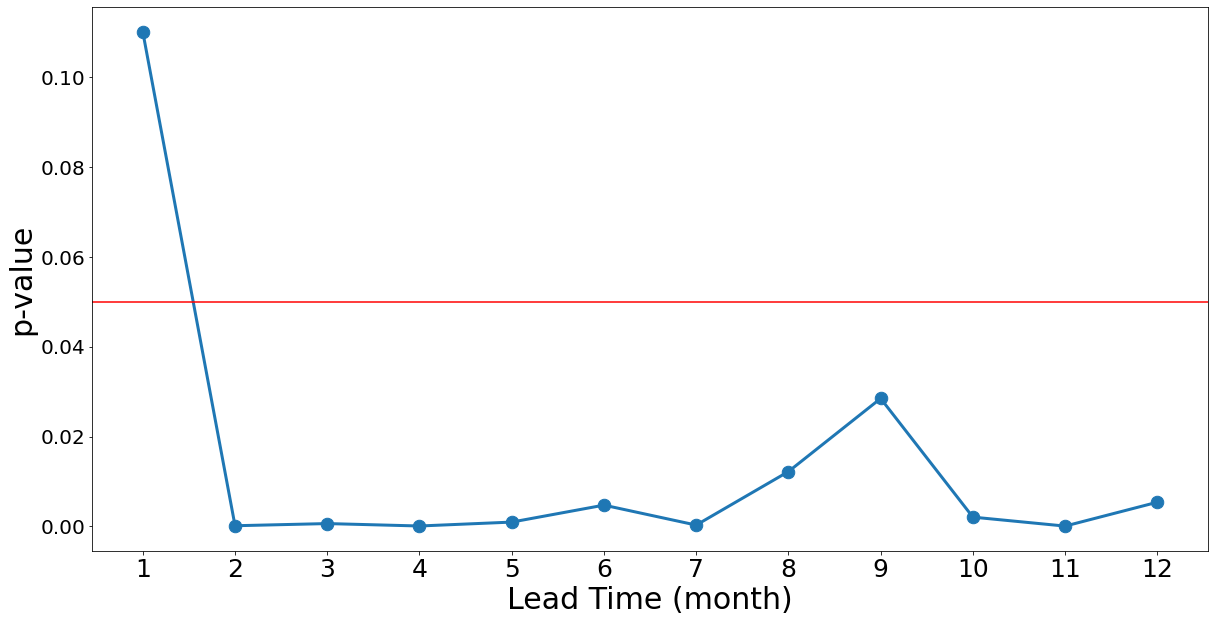

In [21]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
#plt.savefig("p_pcmci.png");

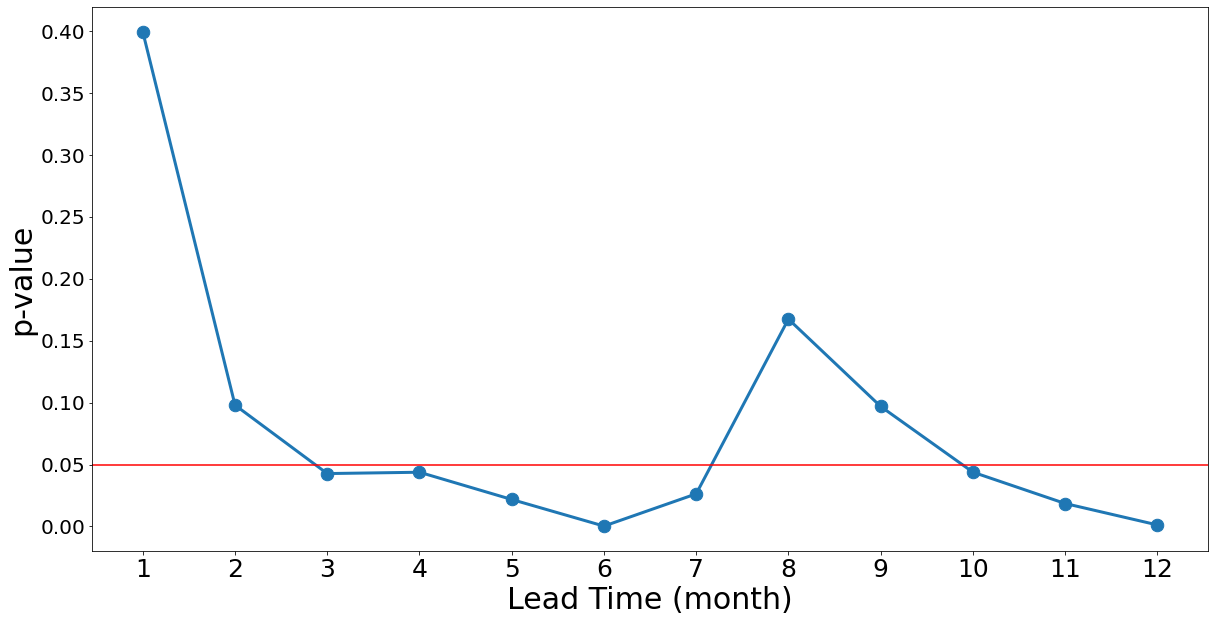

In [23]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
#plt.savefig("p_pcmci.png");

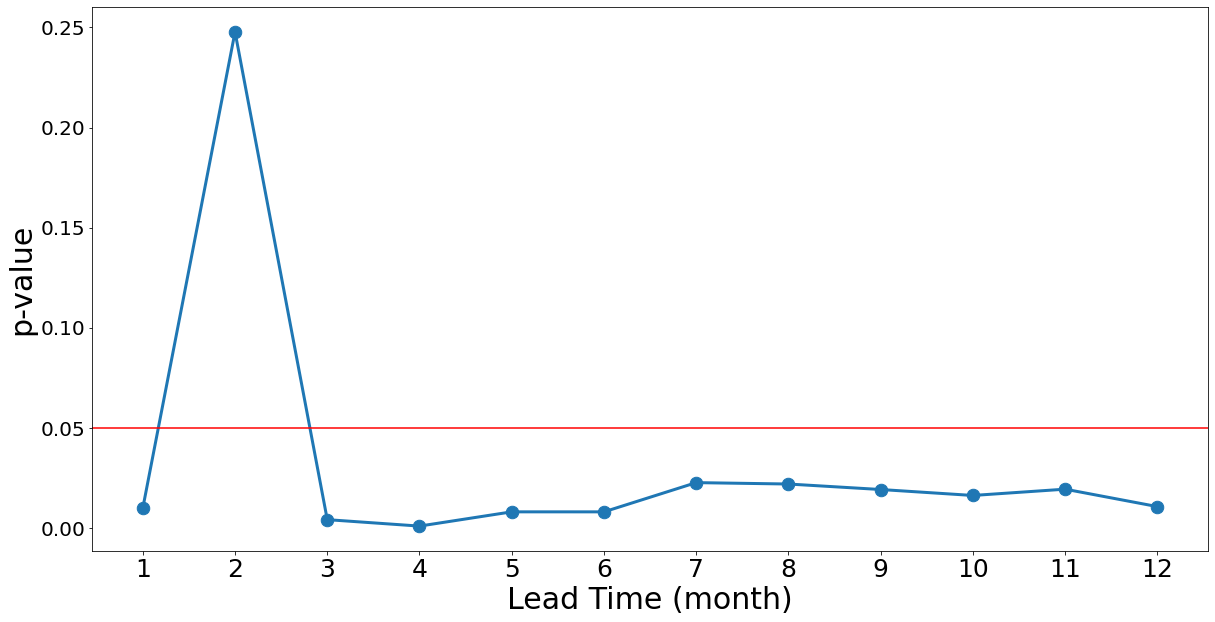

In [19]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25)
plt.savefig("p_pcmci.png");

In [25]:
p_values = []
for i in range(12):
    d = enso[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:2.465976086042885 p:0.010026595980925947
Tau:2 T:0.690603258884884 p:0.24775022000242658
Tau:3 T:2.8297199984093107 p:0.004260637687332865
Tau:4 T:3.391038632334798 p:0.0010451328100722387
Tau:5 T:2.5555293692755927 p:0.008160193869033492
Tau:6 T:2.5559038685664937 p:0.008153112493825289
Tau:7 T:2.093445485438012 p:0.022744359999042278
Tau:8 T:2.1081576571276055 p:0.02204771325194574
Tau:9 T:2.170408774249471 p:0.019305755179641566
Tau:10 T:2.2476050113031434 p:0.016331986297016855
Tau:11 T:2.166329273183287 p:0.019475633900028228
Tau:12 T:2.4342185411576183 p:0.010777778759862048


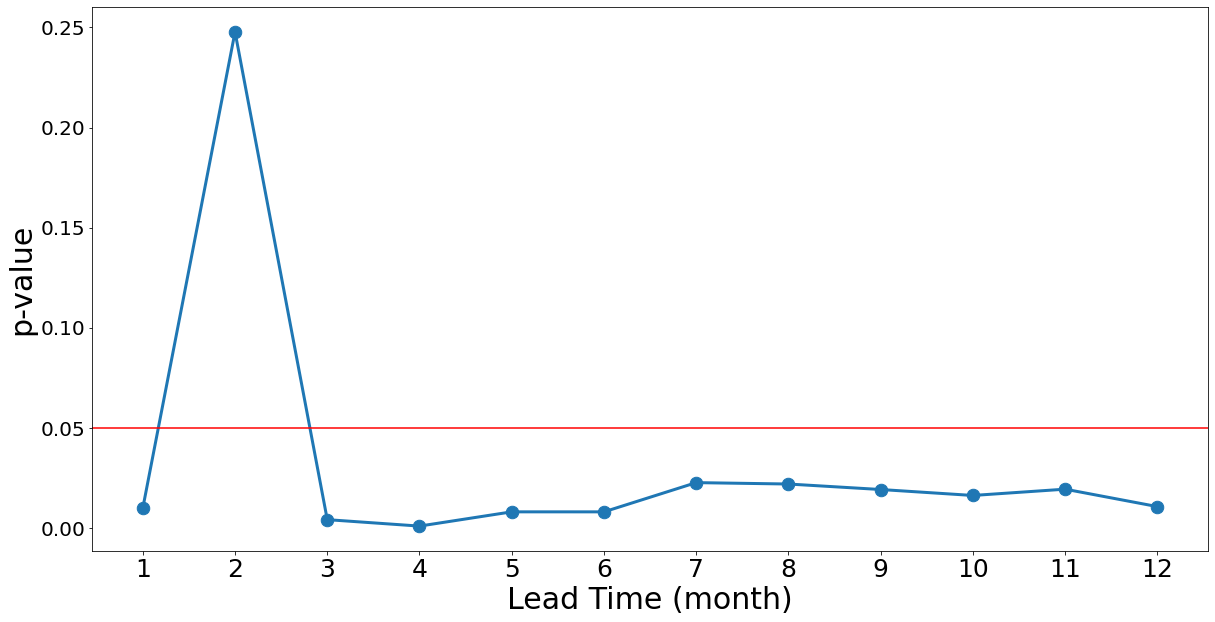

In [95]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25)
plt.savefig("p_corr.png");

In [ ]:
p_values = []
for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

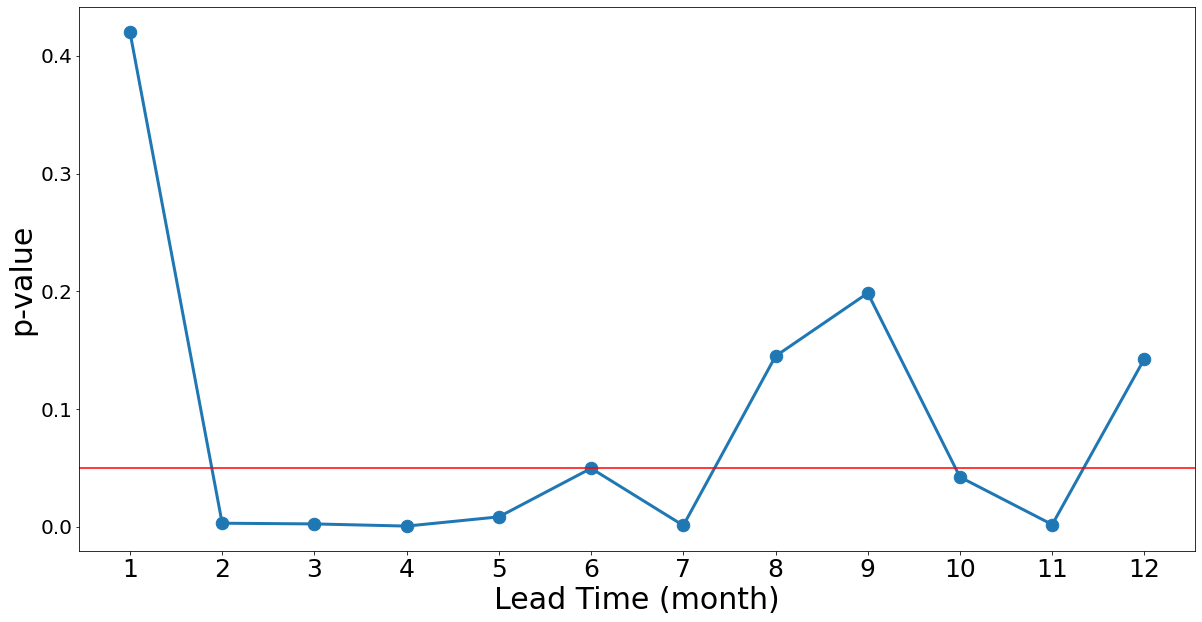

In [15]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25);
#plt.savefig("p_corr.png");

In [17]:
p_values = []
for i in range(12):
    d = enso[i,:] - base[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:0.9178803472700034 p:0.18326042326896846
Tau:2 T:-0.9757613559222073 p:0.16876906679845677
Tau:3 T:0.9288849261642408 p:0.1804439322905524
Tau:4 T:0.7556732738446915 p:0.22807782437028595
Tau:5 T:2.14235982672844 p:0.020501062487700037
Tau:6 T:2.703842930906559 p:0.005761456821789774
Tau:7 T:0.9431650282425644 p:0.17683201586627528
Tau:8 T:1.7520668685124863 p:0.04535459979139834
Tau:9 T:1.9219973234764767 p:0.032418010585145
Tau:10 T:1.8341409800880508 p:0.03864083697192596
Tau:11 T:1.6626121620079104 p:0.053773069569525316
Tau:12 T:2.2968383806721486 p:0.01465799815827997


In [96]:
p_values = []
for i in range(12):
    d = corr[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    p_values.append(p/2)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:-0.83801255973329 p:0.20456023308706484
Tau:2 T:1.254785555015004 p:0.10996479161667755
Tau:3 T:-0.053629354048055 p:0.4788056422626439
Tau:4 T:1.0659419855002468 p:0.14777773740967626
Tau:5 T:1.2792576577614412 p:0.10565320949358475
Tau:6 T:1.1564112446129209 p:0.12864232062908385
Tau:7 T:1.4855372347214795 p:0.07428736006123153
Tau:8 T:-0.29882016202716805 p:0.3836419376699482
Tau:9 T:-0.3652319505255555 p:0.35884139122506686
Tau:10 T:0.33047882411866936 p:0.3717491928319296
Tau:11 T:1.8139336455653985 p:0.04020940798308383
Tau:12 T:-0.6857054331977601 p:0.2492687485474921


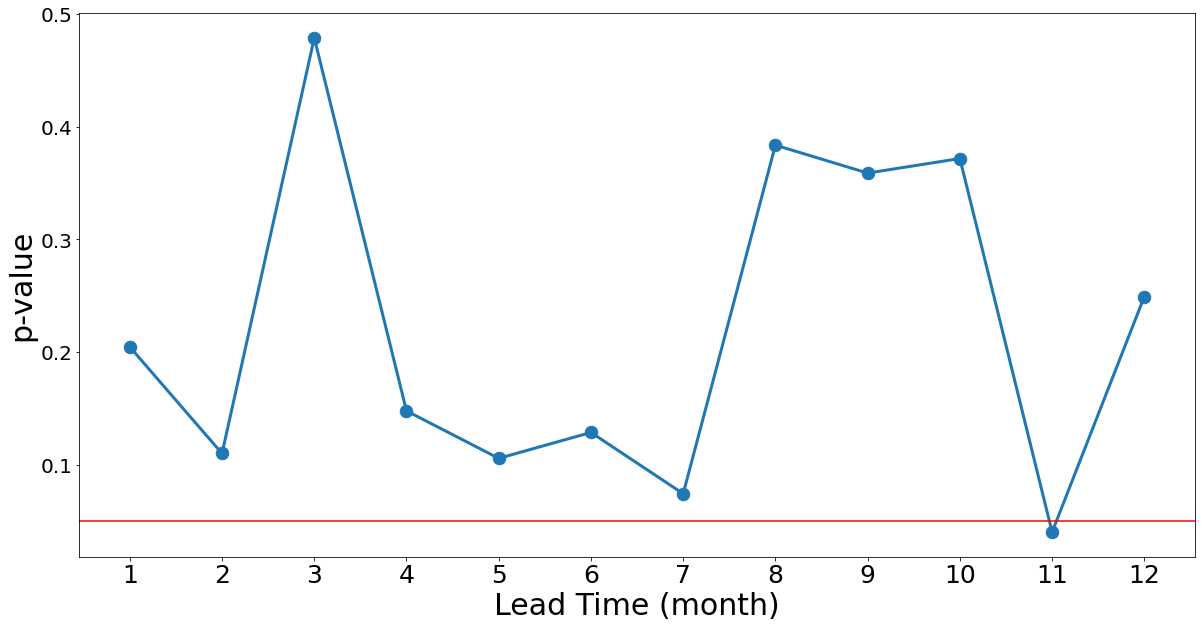

In [97]:
x = np.arange(1,13)
plt.plot(x,p_values, marker=".", markersize=25,linewidth = 3)
plt.axhline(0.05, color = 'r')
plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("p-value", fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(x, fontsize = 25)
plt.savefig("p_corrVSpcmci.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


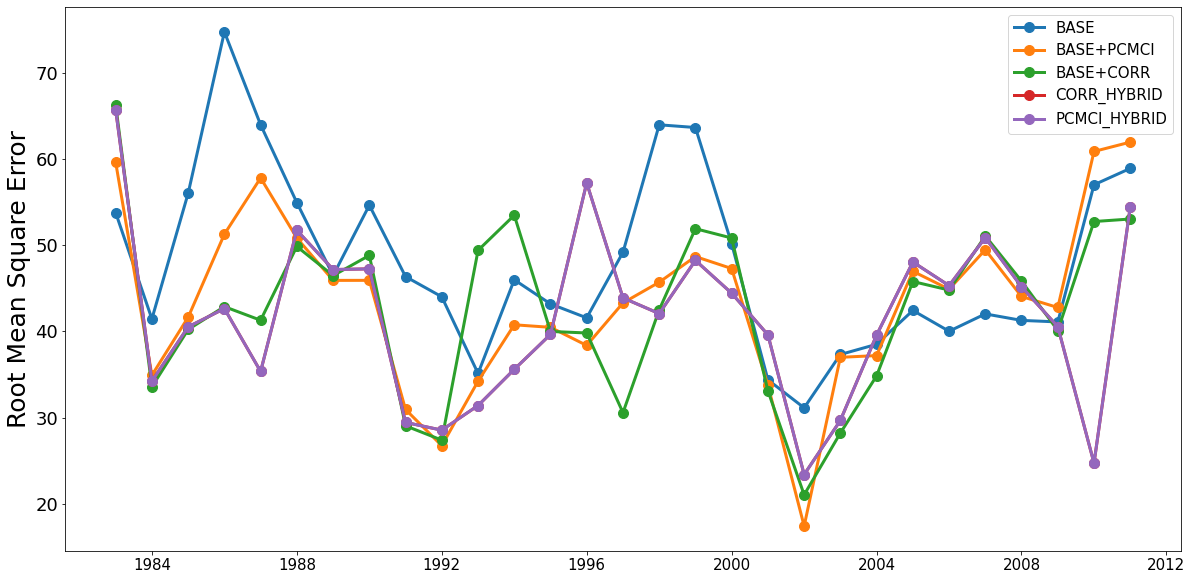

In [11]:
tau = 12
pcmci1 = np.sqrt(pcmci[tau-1,:])
corr1 = np.sqrt(corr[tau-1,:])
enso1 = np.sqrt(enso[tau-1,:])
corr_hybrid1 = np.sqrt(corr_hybrid[tau-1,:])
pcmci_hybrid1 = np.sqrt(corr_hybrid[tau-1,:])

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'BASE', marker=".", markersize=20,linewidth = 3)
plt.plot(x,pcmci1, label = 'BASE+PCMCI', marker=".", markersize=20,linewidth = 3)
plt.plot(x,corr1, label = 'BASE+CORR', marker=".", markersize=20,linewidth = 3)
plt.plot(x,corr_hybrid1, label = 'CORR_HYBRID', marker=".", markersize=20,linewidth = 3)
plt.plot(x,corr_hybrid1, label = 'PCMCI_HYBRID', marker=".", markersize=20,linewidth = 3)
plt.ylabel("Root Mean Square Error", fontsize = 25)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig("TAUexample.png");

In [26]:
f = 12
step = 1
test_start = 1983
test_end = 2015
class_list = np.load("ET_class_list.npy")
extreme_threshold = -1

In [31]:
class_name = 'Aw'
N = np.count_nonzero(class_list == class_name)

In [32]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
base = np.zeros((12,29))

for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}_{}/model_{}_{}_{}_{}_{}.npy".format(abs(extreme_threshold),class_name,f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}_{}/model_{}_{}_{}_{}_{}.npy".format(abs(extreme_threshold),class_name,f,step,test_start,test_end,tau))
   # corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
   # pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}_{}/base_{}_{}_{}_{}_{}.npy".format(abs(extreme_threshold),class_name,f,step,test_start,test_end,tau))

In [33]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p/2))

Tau:1 T:8.44229294929707 p:1.7559111197160852e-09
Tau:2 T:11.307315532314185 p:2.9884384765525236e-12
Tau:3 T:12.783416378269267 p:1.6514797165664598e-13
Tau:4 T:14.586107243738004 p:6.555198811619508e-15
Tau:5 T:15.909977139533044 p:7.416806188698321e-16
Tau:6 T:16.33567801547076 p:3.7959489122595757e-16
Tau:7 T:17.95116737468677 p:3.3830862284144685e-17
Tau:8 T:14.314101490403543 p:1.0454908323927745e-14
Tau:9 T:14.279707382232397 p:1.1095992595965895e-14
Tau:10 T:14.357824380437133 p:9.694666446599533e-15
Tau:11 T:12.614495649813232 p:2.27241701379661e-13
Tau:12 T:11.086223950066548 p:4.711583884878164e-12


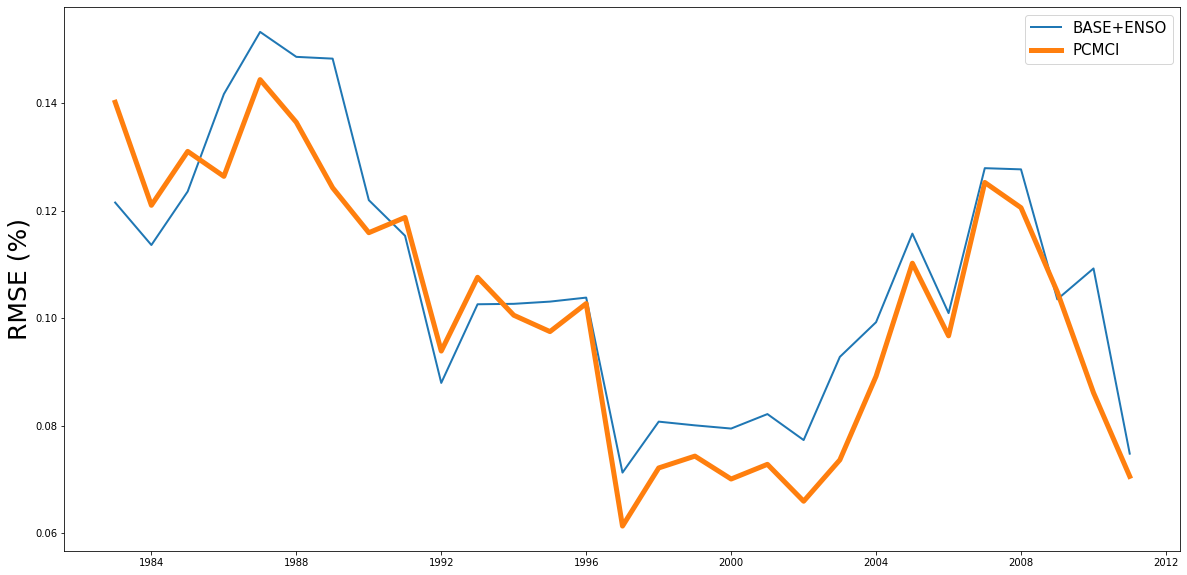

In [36]:
tau = 3
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
#corr1 = np.sqrt(corr[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1, label = 'BASE+ENSO', linewidth = 2)
plt.plot(x,pcmci1, label = 'PCMCI', linewidth = 5)
#plt.plot(x,corr1, label = 'CORR', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)

# Extreme Threshold = -2

In [8]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
enso = np.zeros((12,29))
base = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
corr_hybrid = np.zeros((12,29))

for tau in np.arange(7,13):
    corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_hybrid[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_hybrid_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [10]:
for i in range(7,12):
    d = enso[i,:] - corr_hybrid[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:8 T:1.8744343495827152 p:0.07133902308646202
Tau:9 T:2.121169879935005 p:0.042894898422445836
Tau:10 T:2.818299892051296 p:0.0087597920573209
Tau:11 T:2.4665850414288295 p:0.020025348263167063
Tau:12 T:2.861847843106506 p:0.007882665977752433


In [11]:
for i in range(7,12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:8 T:2.9946909311270398 p:0.005691642987084855
Tau:9 T:2.468872666040226 p:0.019921066977274002
Tau:10 T:2.9843093229339286 p:0.005839525523492501
Tau:11 T:2.6614813235801345 p:0.01273824866628858
Tau:12 T:3.089846662472615 p:0.004492419636822107


In [37]:
for i in range(12):
    d = enso[i,:] - corr_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.5438098063224763 p:0.016769392141306502
Tau:2 T:1.4980645201853526 p:0.1453065414065021
Tau:3 T:1.9234938021446355 p:0.06464005917458425
Tau:4 T:1.8866542991858923 p:0.06961657862562991
Tau:5 T:1.8127409152975165 p:0.0806073458497785
Tau:6 T:1.5702115620490085 p:0.12759910224701093
Tau:7 T:2.043794977096903 p:0.05048359896414931
Tau:8 T:2.0310880771550557 p:0.05183738270339232
Tau:9 T:1.8493851119843905 p:0.07498513949533603
Tau:10 T:2.5755062808889164 p:0.015580598978470516
Tau:11 T:2.2463792250800805 p:0.032751567506745155
Tau:12 T:2.7744191431558205 p:0.009735986069069584


In [38]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.098041543852962 p:0.004401262818573379
Tau:2 T:0.8298616159531467 p:0.4136366643953062
Tau:3 T:1.2006221714929326 p:0.23995690193399932
Tau:4 T:1.44088147176574 p:0.16070837854613484
Tau:5 T:4.063982124530586 p:0.0003538805706139304
Tau:6 T:3.9808747439882572 p:0.0004423066461204788
Tau:7 T:3.882319609004352 p:0.0005755902719680908
Tau:8 T:2.449848882415911 p:0.020803667589690086
Tau:9 T:2.898943491150162 p:0.007201537884107298
Tau:10 T:4.072341868040086 p:0.0003460142300884705
Tau:11 T:4.034416855098874 p:0.0003831393659278418
Tau:12 T:4.810286866304189 p:4.658782442913362e-05


In [39]:
for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.061875430675159 p:0.004817322533649711
Tau:2 T:-0.08950927000400703 p:0.9293143881902921
Tau:3 T:0.7195348756599557 p:0.47777464490457044
Tau:4 T:3.662105384460972 p:0.001031552666944461
Tau:5 T:2.6863299070404665 p:0.012011592503986151
Tau:6 T:3.6483672994940384 p:0.0010695077723928594
Tau:7 T:4.618315401389771 p:7.870097454239919e-05
Tau:8 T:2.9137299831214296 p:0.006945868251391123
Tau:9 T:3.065636230983169 p:0.004772369937482333
Tau:10 T:3.9650915634808706 p:0.000461401670107873
Tau:11 T:4.252570081585023 p:0.00021275234414899663
Tau:12 T:4.709538599727656 p:6.135170621095178e-05


In [68]:
for i in range(12):
    d = corr[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.022266678685942533 p:0.9823931554597519
Tau:2 T:1.103116006831832 p:0.2793678461340043
Tau:3 T:0.35721816785044475 p:0.7236068756397289
Tau:4 T:-3.554451389952937 p:0.001367915172219507
Tau:5 T:0.09619091160477847 p:0.9240541309107471
Tau:6 T:-1.1454812738626206 p:0.2617063747480554
Tau:7 T:-2.802880941328074 p:0.009091810540121726
Tau:8 T:-0.8610996422455337 p:0.39649740847254744
Tau:9 T:-0.6129030196791659 p:0.5448869842178355
Tau:10 T:-0.8608424281673 p:0.3966366641331751
Tau:11 T:-1.1416304606044403 p:0.2632773443306582
Tau:12 T:0.008456566467018648 p:0.9933126822276064


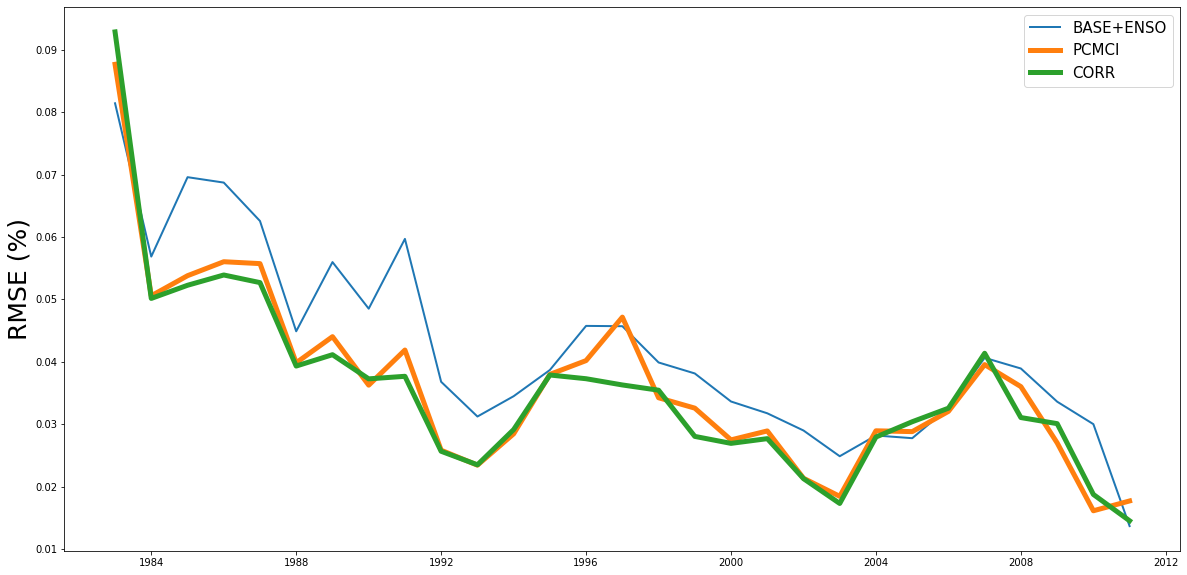

In [71]:
tau = 6
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr1 = np.sqrt(corr[tau-1,:])/N
enso1 = np.sqrt(enso[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,enso1, label = 'BASE+ENSO', linewidth = 2)
plt.plot(x,pcmci1, label = 'PCMCI', linewidth = 5)
plt.plot(x,corr1, label = 'CORR', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)

In [108]:
len(x)

60

In [107]:
len(test)

37

In [98]:
x = np.arange('1991-01', '1996-01', dtype='datetime64[M]')

In [6]:
test = np.load("../../whole_data_results/ET_orac/pcmci_data_1/test_12_2010_2014_12_57.npy")

In [7]:
pred = np.load("../../whole_data_results/ET_orac/pcmci_data_1/pred_12_2010_2014_12_57.npy")

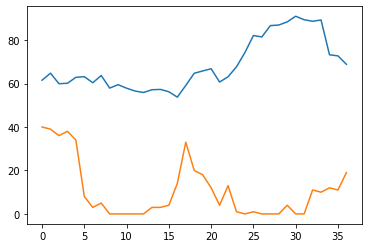

In [8]:
plt.plot(range(len(pred)),pred, range(len(pred)), test)

In [9]:
mean_squared_error(pred,test)

3706.0849790403518

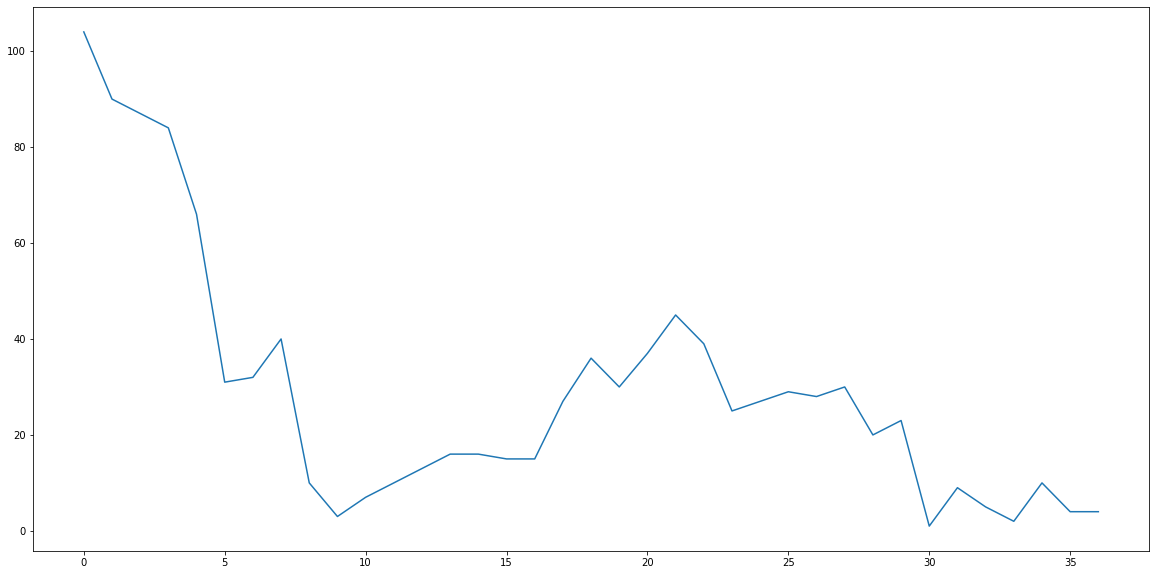

In [143]:
plt.plot(test)

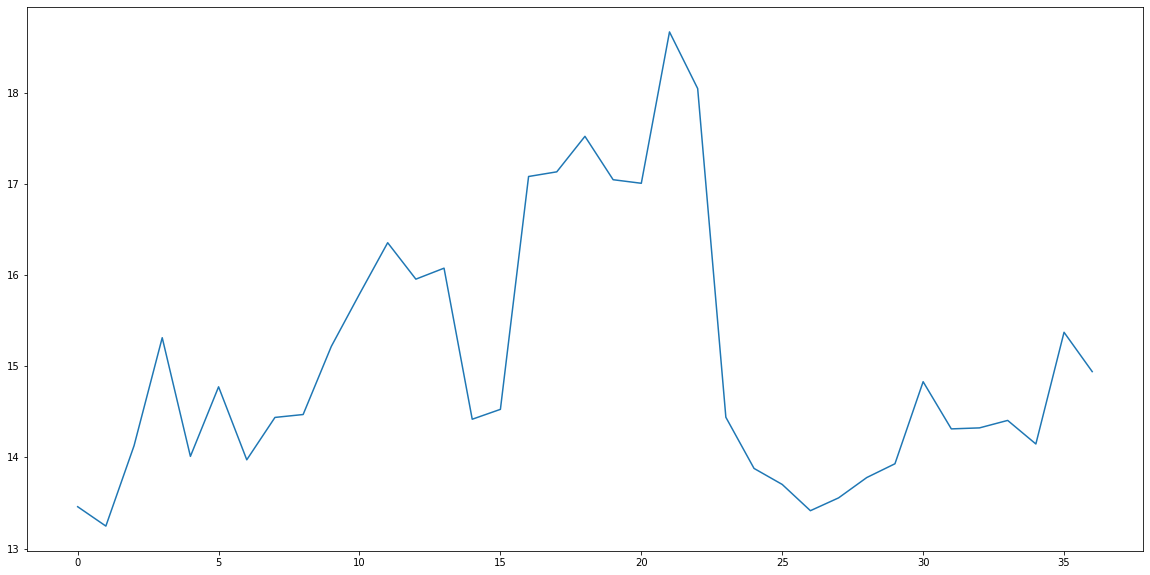

In [144]:
plt.plot(pred)

In [145]:
st.pearsonr(test, pred)

(-0.1363136779909653, 0.4211254947917524)

# confidence interval

In [20]:
from scipy import stats
from numpy import *
s = 3
n=10
c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
y = zeros(50000)
for i in range(len(y)):
    y[i] =sqrt( mean((random.randn(n)*s)**2))

print("1-alpha={}".format((mean( (sqrt(n/c2)*y < s) & (sqrt(n/c1)*y > s)),)))

1-alpha=(0.94998,)


In [345]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
n_components_soil = 40
N = 303

In [349]:
upper = []
lower = []
pcmci = []
upper_base = []
lower_base = []
base = []
for tau in np.arange(1,13):
    pred = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test = np.load("../../whole_data_results/ET_orac/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    test = test/N
    pred = pred/N
    n=len(test)
    c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
    RMSE_temp = np.sqrt(mean_squared_error(test,pred))
    #pcmci.append(RMSE_temp)
    #upper.append(np.sqrt(n/c1)*RMSE_temp)
    #lower.append(np.sqrt(n/c2)*RMSE_temp)
    
    MSE = mean_squared_error(test,pred)
    pcmci.append(MSE)
    upper.append(MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n))
    lower.append(MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n))
    
    
    
    pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    test_base = test_base/N
    pred_base = pred_base/N
    n=len(test_base)
    c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
    #RMSE_temp = np.sqrt(mean_squared_error(test_base,pred_base))
    #base.append(RMSE_temp)
    #upper_base.append(np.sqrt(n/c1)*RMSE_temp)
    #lower_base.append(np.sqrt(n/c2)*RMSE_temp)
    
    MSE_base = mean_squared_error(test_base,pred_base)
    base.append(MSE_base)
    upper_base.append(MSE_base + 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n))
    lower_base.append(MSE_base - 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n))

In [304]:
lower = np.sqrt(lower)/N
upper = np.sqrt(upper)/N
pcmci = np.sqrt(pcmci)/N

lower_base = np.sqrt(lower_base)/N
upper_base = np.sqrt(upper_base)/N
base = np.sqrt(base)/N

In [350]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)

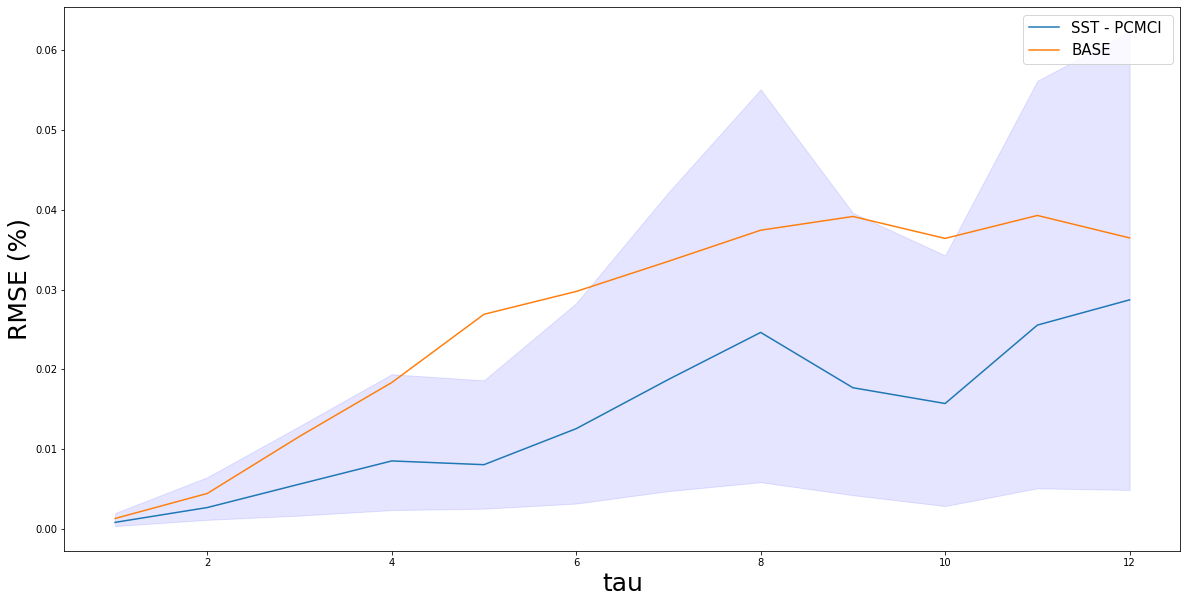

In [351]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,pcmci,label = 'SST - PCMCI ')
ax.fill_between(tau, (pcmci-lower), (pcmci+upper), color='b', alpha=.1)

ax.plot(tau,base, label  ='BASE')
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
ax.legend(fontsize=15)
fig.savefig("CIcpcmciSST.png")

In [68]:
base

[9.417055054593974e-05,
 0.00017060362295532892,
 0.00024717159989041086,
 0.0003045828517916415,
 0.0002960712417598783,
 0.00036995985677225666,
 0.00045173903624369874,
 0.0005179883220977547,
 0.0004390443998648253,
 0.0004137850034370051,
 0.0005275496852441079,
 0.0005592942007565128]

In [70]:
pcmci

[0.028533676815419746,
 0.051692897755464665,
 0.07489299476679451,
 0.09228860409286739,
 0.08970958625324313,
 0.11209783660199377,
 0.1368769279818407,
 0.15695046159561965,
 0.13303045315904208,
 0.12537685604141252,
 0.1598475546289647,
 0.16946614282922337]

In [36]:
n=len(test)
c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)

In [32]:
test = test/N

In [33]:
pred = pred/N

In [34]:
np.std(test - pred)

0.022517268811634916

In [35]:
np.sqrt(np.mean((test - pred))**2)

0.008541137328284652

In [24]:
np.sqrt(n/c2)

0.8339211835659456

In [37]:
RMSE = np.sqrt(mean_squared_error(test,pred))

In [38]:
RMSE

0.024082741156189923

In [39]:
np.sqrt(n/c1)*RMSE

0.030086534097545643

In [40]:
np.sqrt(n/c2)*RMSE

0.02008310800848221

In [38]:
pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [45]:
RMSE_base = np.sqrt(mean_squared_error(pred_base,test_base))

In [46]:
np.sqrt(n/c1)*RMSE_base

74.87754857751463

In [47]:
np.sqrt(n/c2)*RMSE_base

47.184606002089325

In [56]:
np.std((test - pred)**2)/np.sqrt(n)

228.63781837724633

In [57]:
MSE = mean_squared_error(test,pred)

In [59]:
MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n)

2188.5117582477583

In [58]:
MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n)

3084.772006286564

In [60]:
MSE_base = mean_squared_error(test_base,pred_base)

In [61]:
MSE_base - 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n)

2669.5488480577396

In [62]:
MSE_base + 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n)

4029.827066400957

In [ ]:
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [13]:
tau = 1

In [29]:
pred = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test = np.load("../../whole_data_results/ET_orac/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [17]:
n = len(test)

In [16]:
MSE = mean_squared_error(test,pred)

In [18]:
MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n)

42.97106509554423

In [19]:
MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n)

106.52533281189524

In [15]:
pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [ ]:
test = test/303
pred = pred/303

# ET

In [11]:
corr_soil = []
pcmci_soil = []
base = []
n_components_soil = 40
n_components_soil = 57
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303
for tau in range(1,13,1):
    base.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    corr_soil.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    pcmci_soil.append(np.nanmean(np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))


In [2]:
base = np.array(base)/N

NameError: name 'base' is not defined

# Extreme Threshold = -2

In [4]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 371

In [5]:
base = np.zeros((12,29))
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
enso = np.zeros((12,29))

In [6]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_2/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso_2/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [7]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.0459604888594405 p:0.00501205920272654
Tau:2 T:2.5741930934343267 p:0.015628258266172777
Tau:3 T:3.395834701060062 p:0.0020645836677006
Tau:4 T:3.017251342135576 p:0.00538245448287199
Tau:5 T:4.582114629215371 p:8.686904799661437e-05
Tau:6 T:4.067671219141372 p:0.00035038773411883453
Tau:7 T:3.1777815189131253 p:0.003601829348660198
Tau:8 T:2.9946909311270398 p:0.005691642987084855
Tau:9 T:2.468872666040226 p:0.019921066977274002
Tau:10 T:2.9843093229339286 p:0.005839525523492501
Tau:11 T:2.6614813235801345 p:0.01273824866628858
Tau:12 T:3.089846662472615 p:0.004492419636822107


In [8]:
for i in range(12):
    d = enso[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.925945034135855 p:0.006741163776808725
Tau:2 T:1.7553859527936695 p:0.09013003879868964
Tau:3 T:2.790248255206046 p:0.009372616924324239
Tau:4 T:4.919378831999336 p:3.457351920100633e-05
Tau:5 T:3.7831600625852673 p:0.0007492276496294247
Tau:6 T:3.6468251437762644 p:0.0010738523894081738
Tau:7 T:3.37457326915862 p:0.0021808035763777826
Tau:8 T:3.1270903131873347 p:0.004092156158209254
Tau:9 T:2.463943881373074 p:0.02014636976801979
Tau:10 T:2.9219437133702186 p:0.006807581980614874
Tau:11 T:2.8150994426156575 p:0.008827754887499243
Tau:12 T:3.2289611998228853 p:0.0031641544721485878


In [9]:
for i in range(12):
    d = pcmci[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.022266678685942533 p:0.9823931554597519
Tau:2 T:-1.103116006831832 p:0.2793678461340043
Tau:3 T:-0.35721816785044475 p:0.7236068756397289
Tau:4 T:3.554451389952937 p:0.001367915172219507
Tau:5 T:-0.09619091160477847 p:0.9240541309107471
Tau:6 T:1.1454812738626206 p:0.2617063747480554
Tau:7 T:2.802880941328074 p:0.009091810540121726
Tau:8 T:0.8610996422455337 p:0.39649740847254744
Tau:9 T:0.6129030196791659 p:0.5448869842178355
Tau:10 T:0.8608424281673 p:0.3966366641331751
Tau:11 T:1.1416304606044403 p:0.2632773443306582
Tau:12 T:-0.008456566467018648 p:0.9933126822276064


In [10]:
for i in range(12):
    d = base[i,:] - enso[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-1.8930723385469275 p:0.06872643202200565
Tau:2 T:-2.864407431733401 p:0.007833779796585815
Tau:3 T:-3.0270426376952924 p:0.005253296830691999
Tau:4 T:-2.245744331452551 p:0.03279702040560357
Tau:5 T:-3.158271267080592 p:0.0037834918779425394
Tau:6 T:-2.2959262764190504 p:0.0293750837947759
Tau:7 T:-2.038142030791096 p:0.051081957414604334
Tau:8 T:-2.141832203378185 p:0.04104833442488736
Tau:9 T:-1.3450000667148074 p:0.18941887995395845
Tau:10 T:-1.4636760977536405 p:0.15441944209371722
Tau:11 T:-1.2473598801248469 p:0.2225981187864594
Tau:12 T:-1.153201318955292 p:0.2585775169759929


In [19]:
tau = 12

In [11]:
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N
corr1 = np.sqrt(corr[tau-1,:])/N
enso1 = np.sqrt(enso[tau-1,:])/N

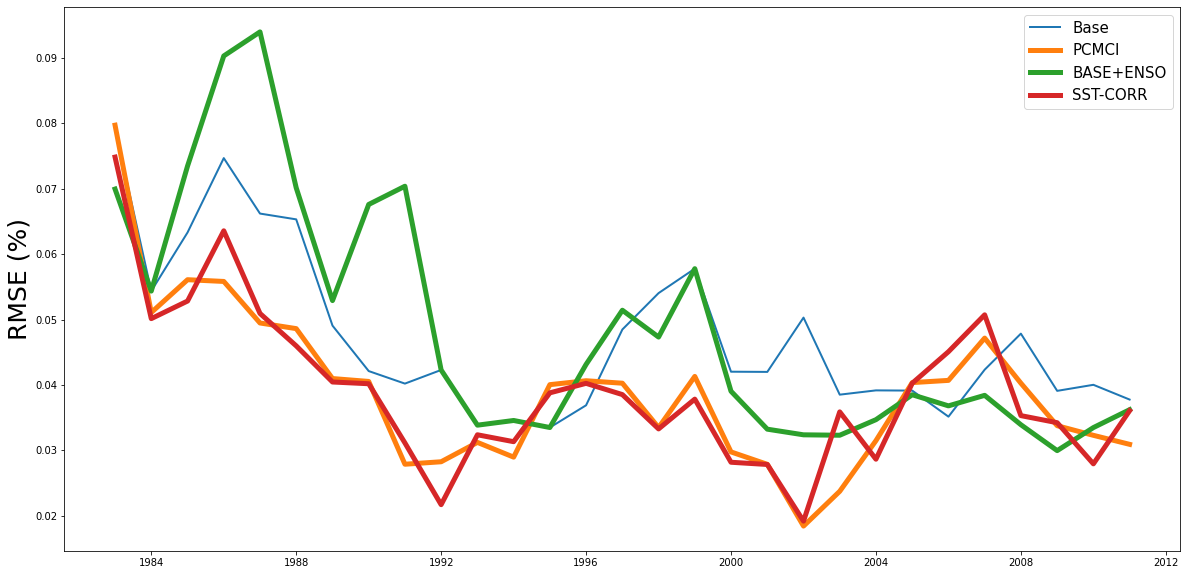

In [13]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,pcmci1, label = 'PCMCI', linewidth = 5)
plt.plot(x,enso1, label = 'BASE+ENSO', linewidth = 5)
plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
#plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
#plt.plot(x,MI1, label = 'SST-MI', linewidth = 5)
#plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
#plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
#plt.plot(x,enso1, label = 'Base + ENSO', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

# Extreme Threshold = -1

In [3]:
n_components_soil = 40
n_components_soil = 57
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 371

In [15]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))
MI = np.zeros((12,29))
pcmci_multi = np.zeros((12,29))

In [16]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_multi[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_multi/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso_1/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    MI[tau-1,] = np.load("../../whole_data_results/ET_orac/MI/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [32]:
test_start = 1985
test_end = 2015
enso = np.zeros((12,27))
for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/oni/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [6]:
test_start = 1983
test_end = 2002
multi = np.zeros((12,16))
for tau in np.arange(9,10):
    multi[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_multi/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [6]:
d = base[11,:] - pcmci[11,:]

In [10]:
def studentT_test_one(var, h_mean = 0):
    n = len(var)
    mean = np.mean(var)
    std = np.std(var)

    t_test = (mean - h_mean) / (std/math.sqrt(n)) 
    p_value = 1 - stats.t.cdf(t_test, n - 1)
    
    return(t_test, p_value)

In [76]:
for i in range(12):
    d = corr_soil[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.5388534010542685 p:0.1350658486723409
Tau:2 T:-1.7545910243578593 p:0.09026846274899818
Tau:3 T:-0.1355319632005767 p:0.893160971951896
Tau:4 T:0.7869683769123038 p:0.43791113105815926
Tau:5 T:0.6621119824871815 p:0.5133125448800187
Tau:6 T:0.7942045536763472 p:0.43375635181371897
Tau:7 T:1.5757828381907706 p:0.12630857605406992
Tau:8 T:0.4849708201861922 p:0.6314697877700062
Tau:9 T:0.6237702573217564 p:0.5378274884348843
Tau:10 T:-0.35662593503490897 p:0.7240453756575042
Tau:11 T:1.3440532315252056 p:0.18972112234852379
Tau:12 T:-1.5763894409881947 p:0.1261687120381649


In [17]:
for i in range(12):
    d = base[i,:] - enso[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.9178803472700034 p:0.36652084653793693
Tau:2 T:0.9757613559222073 p:0.33753813359691354
Tau:3 T:-0.9288849261642408 p:0.3608878645811048
Tau:4 T:-0.7556732738446915 p:0.4561556487405719
Tau:5 T:-2.14235982672844 p:0.041002124975400074
Tau:6 T:-2.703842930906559 p:0.011522913643579548
Tau:7 T:-0.9431650282425644 p:0.35366403173255057
Tau:8 T:-1.7520668685124863 p:0.09070919958279668
Tau:9 T:-1.9219973234764767 p:0.06483602117029
Tau:10 T:-1.8341409800880508 p:0.07728167394385192
Tau:11 T:-1.6626121620079104 p:0.10754613913905063
Tau:12 T:-2.2968383806721486 p:0.02931599631655994


In [18]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.253765834519807 p:0.22029459647821054
Tau:2 T:4.113313866880077 p:0.0003098834767283811
Tau:3 T:3.5818864857610153 p:0.0012732470756892469
Tau:4 T:4.281627645708022 p:0.000196653141063372
Tau:5 T:3.4211034388088963 p:0.0019342314088198974
Tau:6 T:2.785194271314804 p:0.009487226631902223
Tau:7 T:3.866742917450727 p:0.0005999858075043836
Tau:8 T:2.378526335792104 p:0.024441654552531656
Tau:9 T:1.985055474520078 p:0.05701324747047248
Tau:10 T:3.1216695714568754 p:0.004148217133878963
Tau:11 T:4.374884852127112 p:0.00015269886079358926
Tau:12 T:2.7312867487346266 p:0.010794373147848561


In [7]:
for i in range(12):
    d = pcmci_multi[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.05954928403840231 p:0.952937604283767
Tau:2 T:4.192095786051902 p:0.0002505510854797133
Tau:3 T:2.200935212670686 p:0.036152282444947226
Tau:4 T:1.9243187457019486 p:0.06453225427084891
Tau:5 T:0.3606229283739129 p:0.7210877881207316
Tau:6 T:-0.1478648810465008 p:0.8835090848181179
Tau:7 T:2.2925949466088764 p:0.029591810732474823
Tau:8 T:0.15122615107832882 p:0.8808816087344015
Tau:9 T:-0.4234250263395598 p:0.6752200633547573
Tau:10 T:1.650650693884573 p:0.1099841213042796
Tau:11 T:3.45280626433549 p:0.001781912379843297
Tau:12 T:0.8442839536588143 p:0.4056668104809612


In [8]:
for i in range(12):
    d = pcmci[i,:] - pcmci_multi[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.05954928403840231 p:0.952937604283767
Tau:2 T:-4.192095786051902 p:0.0002505510854797133
Tau:3 T:-2.200935212670686 p:0.036152282444947226
Tau:4 T:-1.9243187457019486 p:0.06453225427084891
Tau:5 T:-0.3606229283739129 p:0.7210877881207316
Tau:6 T:0.1478648810465008 p:0.8835090848181179
Tau:7 T:-2.2925949466088764 p:0.029591810732474823
Tau:8 T:-0.15122615107832882 p:0.8808816087344015
Tau:9 T:0.4234250263395598 p:0.6752200633547573
Tau:10 T:-1.650650693884573 p:0.1099841213042796
Tau:11 T:-3.45280626433549 p:0.001781912379843297
Tau:12 T:-0.8442839536588143 p:0.4056668104809612


In [11]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.25313025221054275 p:0.8020168499574243
Tau:2 T:1.1198550794253426 p:0.2722899114017719
Tau:3 T:3.5317511709236995 p:0.001451383316465682
Tau:4 T:4.108235181646879 p:0.0003141517504230896
Tau:5 T:4.194394699589121 p:0.0002489997930538624
Tau:6 T:4.385244940409286 p:0.00014846166227915815
Tau:7 T:4.805395875972455 p:4.7214815990967204e-05
Tau:8 T:4.0508252602094394 p:0.0003666189382092893
Tau:9 T:3.0738148389965874 p:0.004675988225147834
Tau:10 T:3.602326144696252 p:0.0012068895033200664
Tau:11 T:4.276086367704763 p:0.00019962735542706245
Tau:12 T:3.67815270075407 p:0.0009888783707653899


In [19]:
tau = 12

In [10]:
corr1 = np.sqrt(corr[tau-1,2:])/N
pcmci1 = np.sqrt(pcmci[tau-1,2:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,2:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,2:])/N
base1 = np.sqrt(base[tau-1,2:])/N
enso1 = np.sqrt(enso[tau-1,:])/N
MI1 = np.sqrt(MI[tau-1,2:])/N

In [20]:
corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
pcmci_multi1 = np.sqrt(pcmci_multi[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N
enso1 = np.sqrt(enso[tau-1,:])/N
MI1 = np.sqrt(MI[tau-1,:])/N

In [9]:
pcmci1

array([0.20730285, 0.12873014, 0.14299587, 0.15737874, 0.15443669,
       0.12310776, 0.13317623, 0.13368175, 0.12808955, 0.09568275,
       0.09707194, 0.12468039, 0.14124914, 0.11710419, 0.13452268,
       0.14358519, 0.15711852, 0.142549  , 0.12819324, 0.08150649,
       0.1317524 , 0.1120995 , 0.13093607, 0.11710427, 0.12452675,
       0.1332942 , 0.11636299, 0.17865261, 0.13303045])

In [10]:
multi1 = np.sqrt(multi[tau-1,:])/N

In [11]:
multi1

array([0.19235487, 0.12042498, 0.14380089, 0.14840554, 0.16030615,
       0.13807504, 0.14386017, 0.13631975, 0.11669468, 0.09759612,
       0.09584025, 0.12388818, 0.11243   , 0.12604355, 0.1270516 ,
       0.14033863])

In [27]:
len(x)

18

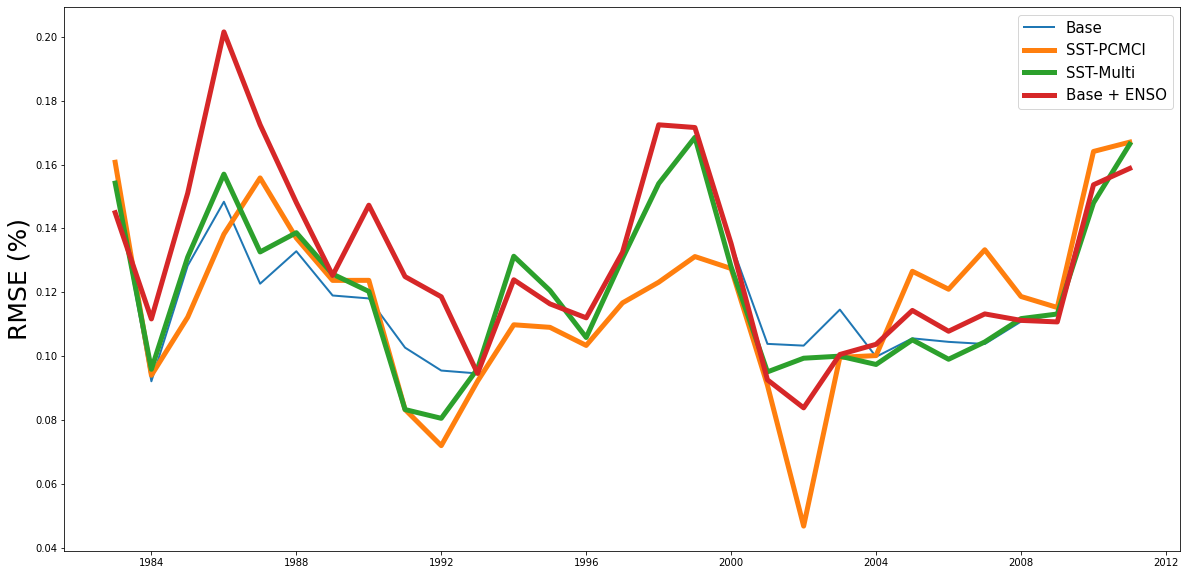

In [21]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,pcmci_multi1, label = 'SST-Multi', linewidth = 5)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
#plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
#plt.plot(x,MI1, label = 'SST-MI', linewidth = 5)
#plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
#plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.plot(x,enso1, label = 'Base + ENSO', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

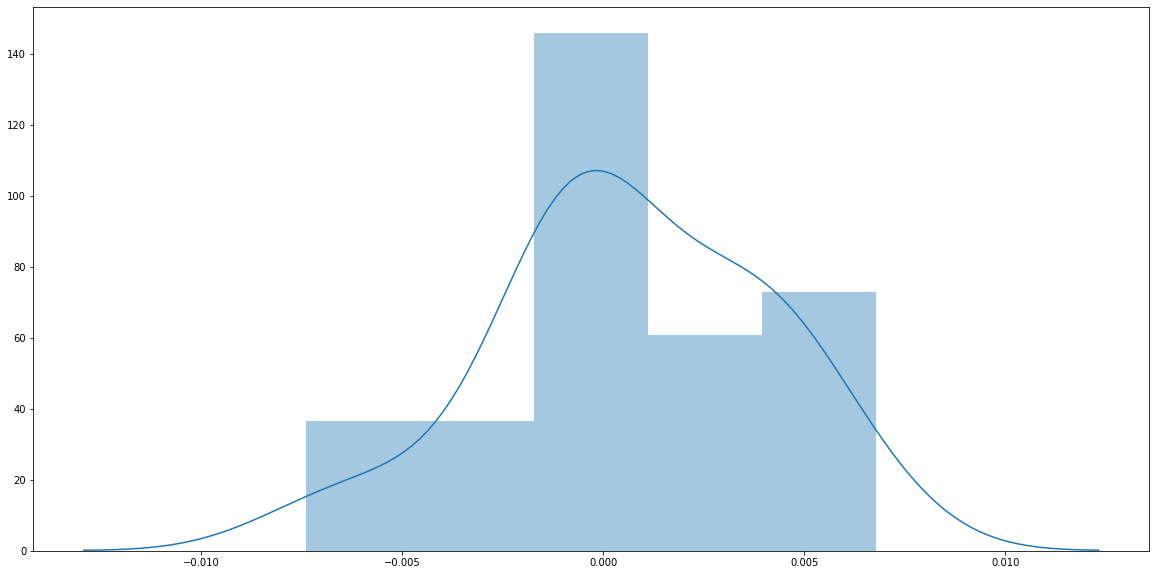

In [281]:
sns_plot = sns.distplot(base1 - corr1)
fig = sns_plot.get_figure()
fig.savefig("diff1dist")

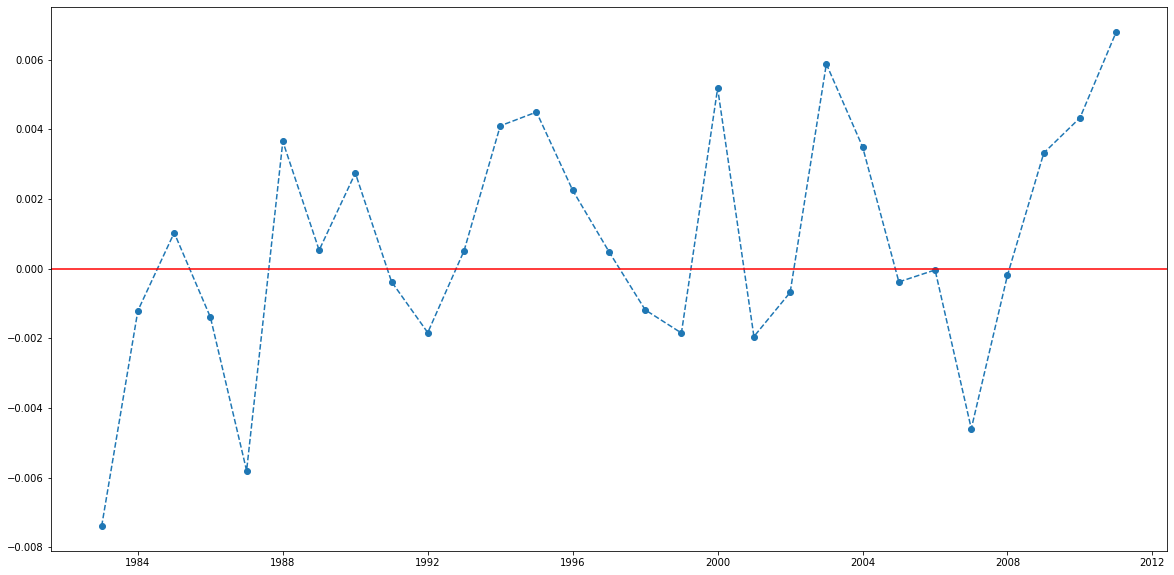

In [282]:
plt.plot(x,base1 - corr1,linestyle='--', marker='o')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.savefig("diff1one.png")

In [288]:
box = np.sqrt(box)/N

In [284]:
taus = np.arange(1,13)

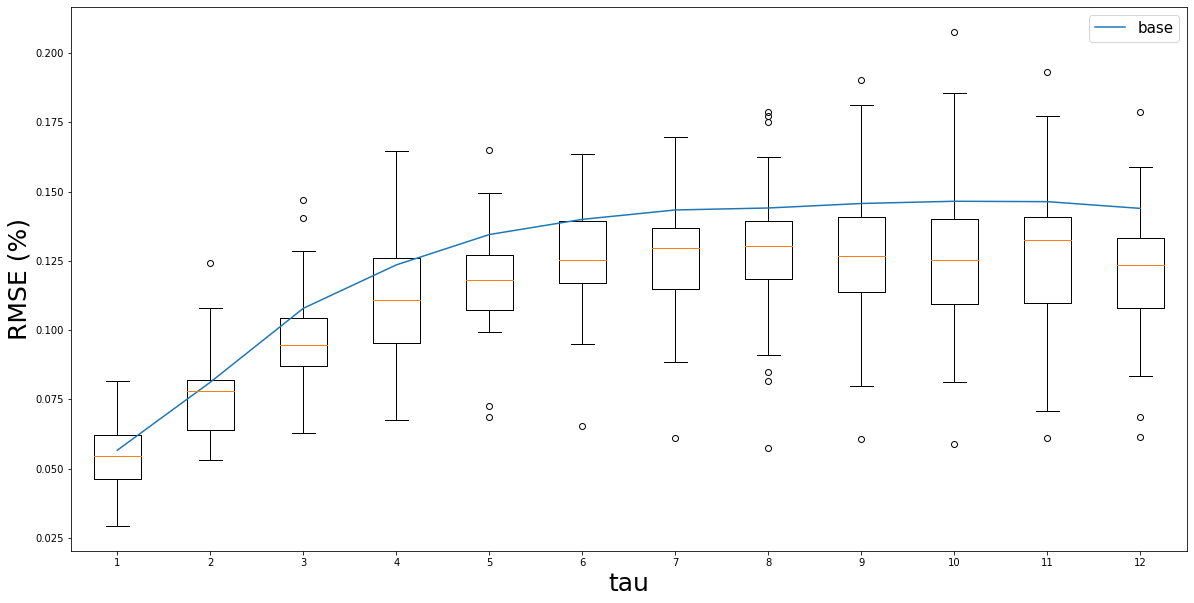

In [342]:
plt.boxplot(np.transpose(box));
plt.plot(taus,np.transpose(base),label = 'base')
plt.legend(fontsize = 15)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
plt.savefig("boxplot.png")

# Aw

In [11]:
f = 12
step = 1
test_start = 2011
test_end = 2015
test_start_soil = 1983
test_end_soil = 2015
#N = 117  #AW
#N = 83 #BSh
N = 63 #Cwb
class_name = 'Cwb'
n_components_sst = 57


#corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))

for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
   # corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
   # pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}/base_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))

In [5]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.7100181935566419 p:0.09832352751394335
Tau:2 T:0.5107728231884981 p:0.6135139787870734
Tau:3 T:-0.7439151459567165 p:0.4631253601256792
Tau:4 T:-0.30225492500420825 p:0.764691614513138
Tau:5 T:-0.307879064536615 p:0.7604530112072726
Tau:6 T:0.26211737879673014 p:0.7951497464746976
Tau:7 T:-0.9728510500793776 p:0.3389573458078765
Tau:8 T:0.5771426027482277 p:0.5684550172347506
Tau:9 T:0.746633284601677 p:0.46150862363115464
Tau:10 T:0.9292360987183159 p:0.3607090551202351
Tau:11 T:2.309913751317733 p:0.028480720075490105
Tau:12 T:1.99213842198482 p:0.05618843888725121


In [12]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.3905047054330866 p:0.002093143707254198
Tau:2 T:2.3390790525688296 p:0.02669492342647697
Tau:3 T:1.8616333442881519 p:0.07318272946224058
Tau:4 T:0.6616658270603494 p:0.5135942425158454
Tau:5 T:0.31612860277959576 p:0.7542495183863808
Tau:6 T:-0.17309708197657828 p:0.8638203731693803
Tau:7 T:0.5340243896505069 p:0.5975393914308018
Tau:8 T:-0.15497066563354475 p:0.8779561821041003
Tau:9 T:0.6778260431234914 p:0.5034451943355458
Tau:10 T:1.438686743483173 p:0.16132451538664824
Tau:11 T:2.0988182595122646 p:0.04497542935480753
Tau:12 T:1.6865835100473439 p:0.10279601426995845


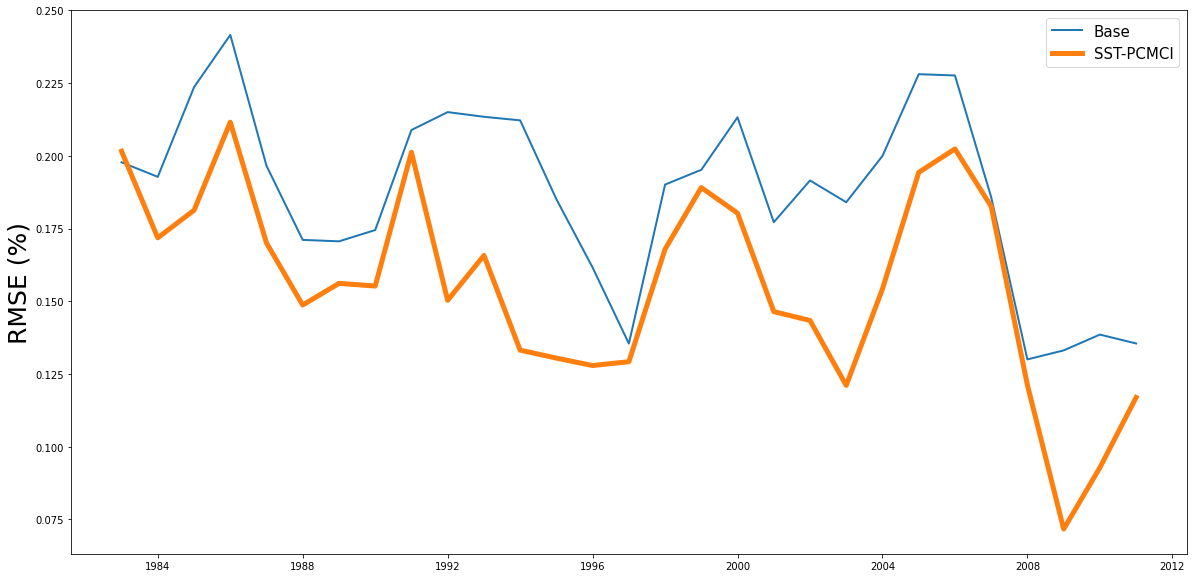

In [31]:
tau = 12

#corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
#corr_soil1 = np.sqrt(corr_soil[tau-1,2:])/N
#pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,2:])/N
base1 = np.sqrt(base[tau-1,:])/N
#enso1 = np.sqrt(enso[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
#plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
#plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
#plt.plot(x,enso1, label = 'Base + ENSO', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

# Hybrid

In [17]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303

In [18]:
corr_sst = np.zeros((12,29))
pcmci_sst = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
pcmci_h = np.zeros((12,29))
#corr_h = np.zeros((12,29))
base = np.zeros((12,29))

In [19]:
for tau in np.arange(1,13):
    corr_sst[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_sst[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #base[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [20]:
for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_h[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_hybrid/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_hybrid/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    

In [21]:
for i in range(12):
    d = base[i,:] - pcmci_h[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.3079843647226221 p:0.7603737240713314
Tau:2 T:0.9982607888328563 p:0.3267022937023105
Tau:3 T:2.3379093578695467 p:0.026764536585055516
Tau:4 T:3.3810232158158557 p:0.002144894975044304
Tau:5 T:3.7450663359255256 p:0.0008287598110050853
Tau:6 T:3.7114712169762254 p:0.0009057012981339579
Tau:7 T:4.590211008188643 p:8.497196811536996e-05
Tau:8 T:2.8181133222065684 p:0.008763740384573579
Tau:9 T:4.804075994270758 p:4.738545393160608e-05
Tau:10 T:2.9011496644521415 p:0.007162834566136975
Tau:11 T:4.274092058404093 p:0.00020070862923368313
Tau:12 T:3.4488152160498275 p:0.001800428883917672


In [23]:
for i in range(12):
    d = pcmci_sst[i,:] - pcmci_h[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.7740731871602494 p:0.44537468656098533
Tau:2 T:-0.8036100514457647 p:0.4283920715643963
Tau:3 T:-2.0553737420003197 p:0.04927729215756405
Tau:4 T:-0.30186122516032377 p:0.7649886046030913
Tau:5 T:-0.3030706130792504 p:0.7640764109427702
Tau:6 T:-0.28232815392614274 p:0.7797683850105441
Tau:7 T:1.0445871158188649 p:0.3051487316883888
Tau:8 T:-0.2007182756087036 p:0.8423697450433514
Tau:9 T:2.507853620093338 p:0.01821922808206015
Tau:10 T:0.5742394259487101 p:0.5703907129942529
Tau:11 T:2.815902455047714 p:0.008810656104151436
Tau:12 T:0.2539675775100647 p:0.8013763550067287


In [30]:
tau = 11

In [31]:
#corr1 = np.sqrt(corr[tau-1,:])/N
pcmci_sst1 = np.sqrt(pcmci_sst[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
pcmci_h1 = np.sqrt(pcmci_h[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

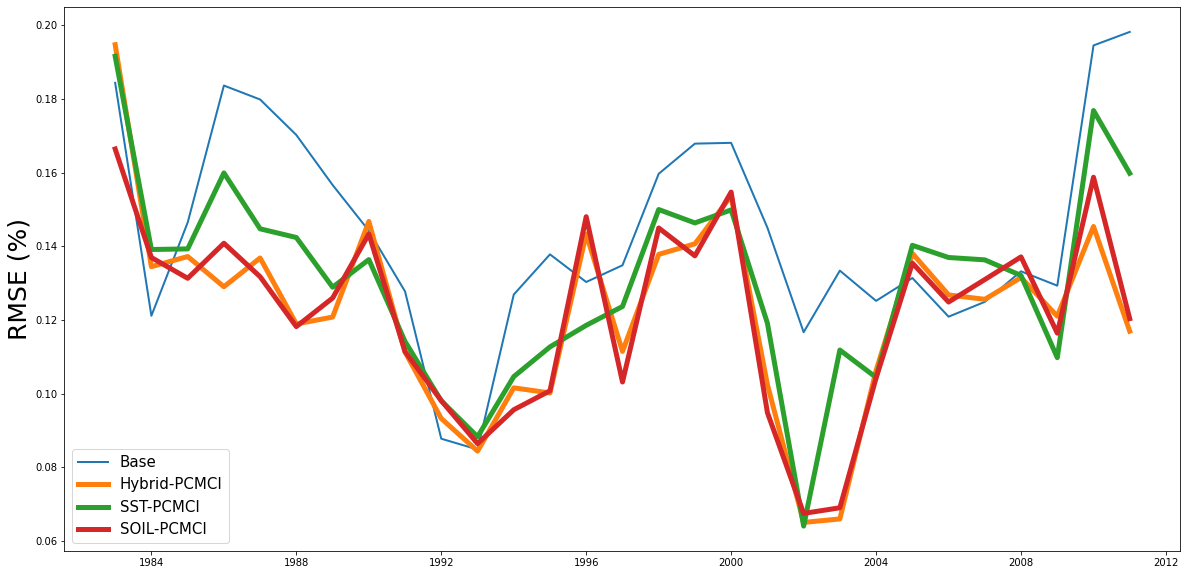

In [32]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci_h1, label = 'Hybrid-PCMCI', linewidth = 5)
plt.plot(x,pcmci_sst1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'SOIL-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

In [ ]:



d = base[11,:] - pcmci[11,:]

def studentT_test_one(var, h_mean = 0):
    n = len(var)
    mean = np.mean(var)
    std = np.std(var)

    t_test = (mean - h_mean) / (std/math.sqrt(n)) 
    p_value = 1 - stats.t.cdf(t_test, n - 1)
    
    return(t_test, p_value)


for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))





In [ ]:
base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

# ZW

In [29]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 175
cc = 'ZW'

In [30]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))

In [31]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/base_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/{}/enso/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))

In [71]:
test_start = 1985
test_end = 2015
enso = np.zeros((12,27))
for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/ZW/oni/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [28]:
for i in range(12):
    d = enso[i,:] - pcmci[i,2:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

ValueError: operands could not be broadcast together with shapes (29,) (27,) 

In [32]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.06666331487394478 p:0.9473234742797918
Tau:2 T:2.2445627807490576 p:0.03288176078772203
Tau:3 T:2.537747891534465 p:0.017006097293621503
Tau:4 T:2.6295086119642193 p:0.013733588231073308
Tau:5 T:2.9729215269120335 p:0.006005935224010849
Tau:6 T:3.0585754980825537 p:0.004857098605997505
Tau:7 T:1.3402580350143587 p:0.19093636048490759
Tau:8 T:1.1035764727723927 p:0.27917139463487967
Tau:9 T:1.8539032908313582 p:0.07431585821447449
Tau:10 T:2.416687551034145 p:0.022428484864405063
Tau:11 T:2.1759997926938155 p:0.038150179515740554
Tau:12 T:2.5104432163862183 p:0.018111062542227087


In [33]:
for i in range(12):
    d = base[i,:] - enso[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.237089343574521 p:0.033422344181967746
Tau:2 T:0.5906131882717838 p:0.5595170583390365
Tau:3 T:-0.8125003054450719 p:0.42335924112441725
Tau:4 T:-1.0812686078363434 p:0.28880280926840185
Tau:5 T:-0.5751845433148078 p:0.5697601916526507
Tau:6 T:-0.04466903281846379 p:0.964688168467215
Tau:7 T:1.0777364824403977 p:0.29034920919866264
Tau:8 T:1.3045061419671273 p:0.20268229547052535
Tau:9 T:1.5335614382361302 p:0.13636037354612354
Tau:10 T:1.2018382685976232 p:0.23949282182704967
Tau:11 T:2.61846308620709 p:0.014093946492002659
Tau:12 T:2.6832153732425246 p:0.012100501997593965


In [40]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.24496289873136057 p:0.8082715930430362
Tau:2 T:-0.3570524882988933 p:0.7237295381836542
Tau:3 T:-0.773755197334906 p:0.4455596956876091
Tau:4 T:-0.12898438376021934 p:0.8982920713466486
Tau:5 T:0.2874751138937905 p:0.7758655076390154
Tau:6 T:0.3999647068108306 p:0.6922175388759088
Tau:7 T:0.17589962607431903 p:0.861638793483802
Tau:8 T:0.6378611864754964 p:0.5287464465006606
Tau:9 T:0.6553370759590537 p:0.5175992669185838
Tau:10 T:1.6405993612227001 p:0.11206821565456412
Tau:11 T:3.656776904760128 p:0.0010461155692479403
Tau:12 T:1.586254069080027 p:0.12391202727042991


In [41]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.24496289873136057 p:0.8082715930430362
Tau:2 T:-0.3570524882988933 p:0.7237295381836542
Tau:3 T:-0.773755197334906 p:0.4455596956876091
Tau:4 T:-0.12898438376021934 p:0.8982920713466486
Tau:5 T:0.2874751138937905 p:0.7758655076390154
Tau:6 T:0.3999647068108306 p:0.6922175388759088
Tau:7 T:0.17589962607431903 p:0.861638793483802
Tau:8 T:0.6378611864754964 p:0.5287464465006606
Tau:9 T:0.6553370759590537 p:0.5175992669185838
Tau:10 T:1.6405993612227001 p:0.11206821565456412
Tau:11 T:3.656776904760128 p:0.0010461155692479403
Tau:12 T:1.586254069080027 p:0.12391202727042991


In [17]:
for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.2021581095842513 p:0.03605676257804029
Tau:2 T:1.4400396884361635 p:0.16094447457051414
Tau:3 T:0.5269708257364992 p:0.6023643478411778
Tau:4 T:0.9038474511778138 p:0.3737873541820309
Tau:5 T:1.700652069105279 p:0.10009101023420805
Tau:6 T:2.3166078269843258 p:0.0280615053592899
Tau:7 T:2.8920539365155893 p:0.007323679520015548
Tau:8 T:2.3526150040059055 p:0.025901249794264367
Tau:9 T:3.143791291699769 p:0.003923953697907855
Tau:10 T:3.1971853181444136 p:0.0034294642270117845
Tau:11 T:4.614551811977667 p:7.951327168542091e-05
Tau:12 T:4.594299772504303 p:8.402963873123439e-05


In [18]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.2202934283090703 p:0.03466660288752954
Tau:2 T:1.714801189050999 p:0.09743110857414855
Tau:3 T:1.2906605722177673 p:0.20737747102033338
Tau:4 T:0.5361805476279075 p:0.5960681855967377
Tau:5 T:1.4875530998130129 p:0.14804485053842392
Tau:6 T:2.0094091436320713 p:0.054221026485182545
Tau:7 T:2.2268683233745286 p:0.034174643044267004
Tau:8 T:2.637529720690375 p:0.013477295098132964
Tau:9 T:3.3535797165369994 p:0.0023017436271401885
Tau:10 T:3.600220512704272 p:0.00121356692561194
Tau:11 T:4.757311875429582 p:5.384522201554428e-05
Tau:12 T:4.950345570921536 p:3.1766517962285476e-05


In [19]:
for i in range(12):
    d = pcmci[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.1934168512327685 p:0.8480287713684267
Tau:2 T:-1.4011448011013725 p:0.1721575101938429
Tau:3 T:-1.2707884310923832 p:0.2142610809945758
Tau:4 T:0.8877619417298311 p:0.38223155634420847
Tau:5 T:0.3752974278707317 p:0.710267323317588
Tau:6 T:0.8863120309993381 p:0.3829987133112014
Tau:7 T:0.6260202227028314 p:0.5363719532366363
Tau:8 T:-0.4142339189647322 p:0.6818590365972361
Tau:9 T:-0.39011584971605257 p:0.6994028813095864
Tau:10 T:-0.5704653415150732 p:0.5729120282818756
Tau:11 T:0.9284960897534965 p:0.36108592004331097
Tau:12 T:0.8227973925412343 p:0.41757580977049014


In [50]:
tau = 12

In [51]:
corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

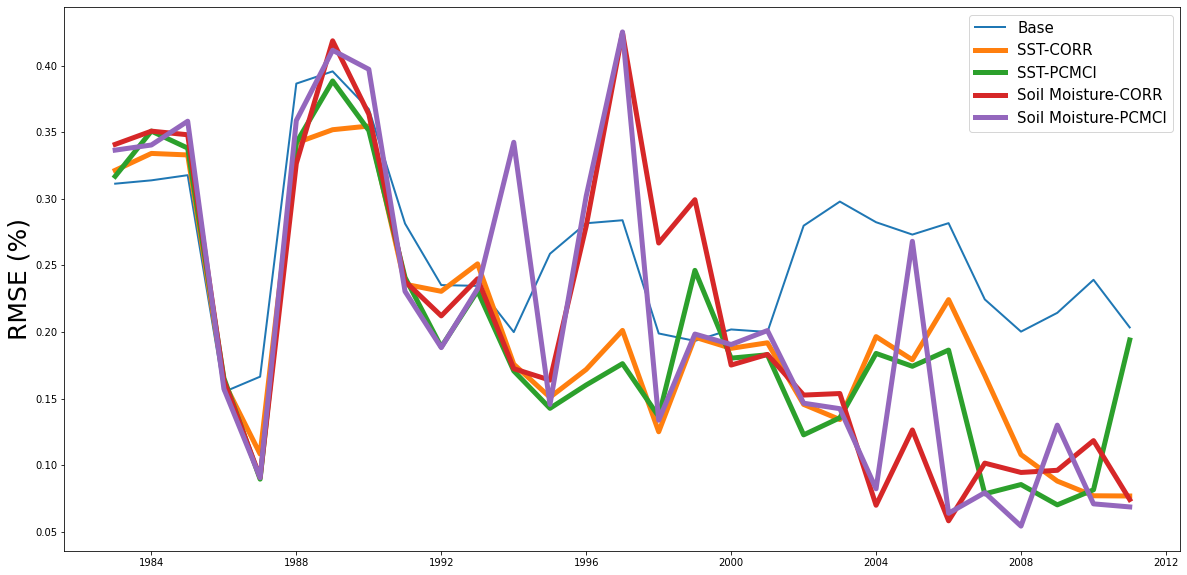

In [52]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
plt.savefig("diff9zim.png")

# NE

In [20]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 375
cc = 'NE'

corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))

In [21]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/base_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/{}/enso/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))

In [75]:
test_start = 1985
test_end = 2015
enso = np.zeros((12,27))
for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/NE/oni/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [76]:
for i in range(12):
    d = enso[i,:] - pcmci[i,2:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.931893978756868 p:0.006939150174102475
Tau:2 T:2.7460148554285464 p:0.010800954752592002
Tau:3 T:3.1726509194736985 p:0.003855110446014331
Tau:4 T:3.276298794426816 p:0.002979941990943079
Tau:5 T:3.0189271752503393 p:0.0056208561610218
Tau:6 T:2.9371751728606004 p:0.006851416680369969
Tau:7 T:2.9561317146385155 p:0.006545106949098431
Tau:8 T:4.185271908061968 p:0.00028795778775354787
Tau:9 T:3.251924038371719 p:0.0031666651588361356
Tau:10 T:3.250789214780539 p:0.003175627785142077
Tau:11 T:3.5315116422113917 p:0.0015655833179367765
Tau:12 T:3.0871672332965754 p:0.004758053125911952


In [39]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.1907627560272882 p:0.24374408523906388
Tau:2 T:2.746841732397646 p:0.010400828189989261
Tau:3 T:2.6718576022747453 p:0.012429961216068179
Tau:4 T:3.0302028350920747 p:0.005212243843958898
Tau:5 T:1.9716191681687965 p:0.058607109543434205
Tau:6 T:1.8823098285483124 p:0.07022478024816774
Tau:7 T:1.4682283965027332 p:0.15318740058304686
Tau:8 T:3.4887198410066813 p:0.0016233808535288687
Tau:9 T:0.4305157270122976 p:0.6701163767492309
Tau:10 T:2.412091621287873 p:0.02266262998725604
Tau:11 T:3.6940376309942615 p:0.0009483332183855533
Tau:12 T:2.059987443104028 p:0.04880377071280794


In [22]:
for i in range(12):
    d = pcmci[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:-0.6466557482447947 p:0.5231206758747214
Tau:2 T:-0.6546902913773166 p:0.5180095294873577
Tau:3 T:1.1732087489237817 p:0.25059613574473655
Tau:4 T:-0.5164486309901871 p:0.6095962003869877
Tau:5 T:1.088801028158037 p:0.2855246093865652
Tau:6 T:0.8202376147294097 p:0.41900892528534783
Tau:7 T:1.8312725932639873 p:0.07772048553590909
Tau:8 T:1.3849825977055652 p:0.176994521386877
Tau:9 T:1.4212149489894483 p:0.16629674919677645
Tau:10 T:1.2251407082335457 p:0.23072880652196143
Tau:11 T:-1.0778496161905018 p:0.2902995872102142
Tau:12 T:0.6335717851738853 p:0.5315020603673803


In [10]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:2.0608692230114665 p:0.04871372995256229
Tau:2 T:5.5362930380195445 p:6.418125927148233e-06
Tau:3 T:2.176640114754898 p:0.03809766118317924
Tau:4 T:1.9789563171632907 p:0.057731980976612474
Tau:5 T:3.349179090691341 p:0.0023279029078391482
Tau:6 T:2.8686794370101047 p:0.007752824580754656
Tau:7 T:1.5603532155055586 p:0.12990916061947455
Tau:8 T:2.439614296108565 p:0.021293223779663927
Tau:9 T:0.5114024984836502 p:0.6130787623198488
Tau:10 T:1.9849219749833718 p:0.05702889488948971
Tau:11 T:1.919862453359185 p:0.0651164738105733
Tau:12 T:3.605769435012063 p:0.001196047017765585


In [17]:
for i in range(12):
    d = base[i,:] - corr_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.2424364457333792 p:0.22438086000921745
Tau:2 T:5.519447940536412 p:6.719035558947021e-06
Tau:3 T:4.6211778025867565 p:7.808871445561643e-05
Tau:4 T:2.525443533470802 p:0.017496083874827248
Tau:5 T:1.8117167132839178 p:0.08076953898764386
Tau:6 T:0.5357963994364262 p:0.5963301730206281
Tau:7 T:1.2510230213705316 p:0.22127867104782337
Tau:8 T:0.6258684479570955 p:0.5364700727490501
Tau:9 T:0.5301919932881446 p:0.6001586272302126
Tau:10 T:0.9789855775106059 p:0.33597054701991014
Tau:11 T:1.6444966505561343 p:0.11125626616015907
Tau:12 T:2.404143280677261 p:0.02307285680533473


In [18]:
for i in range(12):
    d = corr_soil[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:1.6058766756428857 p:0.11952176814687339
Tau:2 T:0.28577074954895215 p:0.7771572513313836
Tau:3 T:-0.9876632593339617 p:0.3317761132816238
Tau:4 T:-0.4118830729758109 p:0.6835613186689149
Tau:5 T:1.299624277459175 p:0.2043283840611485
Tau:6 T:1.319970070328681 p:0.1975353085183156
Tau:7 T:0.431079287501755 p:0.6697114255975277
Tau:8 T:1.6216858816954034 p:0.11607883720824042
Tau:9 T:-0.19501761768748924 p:0.8467873663528606
Tau:10 T:1.339061940600227 p:0.19132060422257055
Tau:11 T:0.4418257100409411 p:0.6620089791205699
Tau:12 T:1.3342606119726335 p:0.1928690626871361


In [23]:
tau = 12

corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

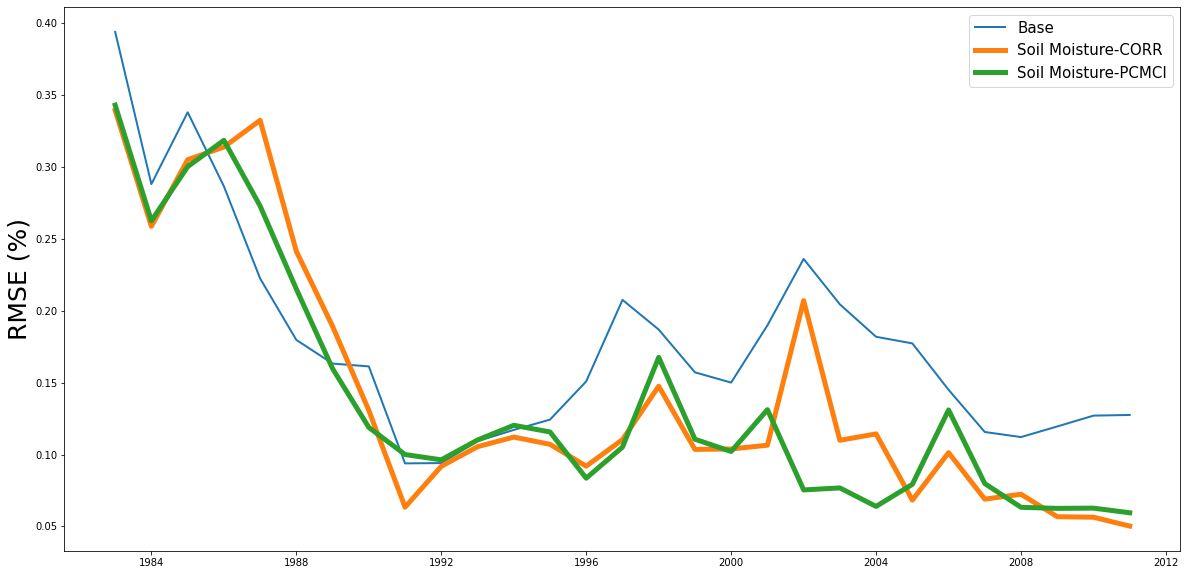

In [24]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
plt.savefig("diff9zim.png")

In [28]:
taus = np.arange(1,13,1)

In [32]:
base_mean = base.mean(axis=1)/N
corr_soil_mean = corr_soil.mean(axis=1)/N
pcmci_soil_mean = pcmci_soil.mean(axis=1)/N

In [34]:
base_mean

array([ 2.18675165,  4.15834738,  5.55797034,  7.01378027,  8.01219223,
        8.90572391,  9.98834452, 11.18919606, 11.66117073, 12.43263952,
       13.27277691, 13.80132694])

In [35]:
corr_soil_mean

array([ 1.71910185,  2.57283193,  3.91660184,  5.55307769,  6.80661056,
        8.32022641,  8.62144306, 10.25166386, 10.67234229, 11.15157753,
       10.78504753, 10.60185033])

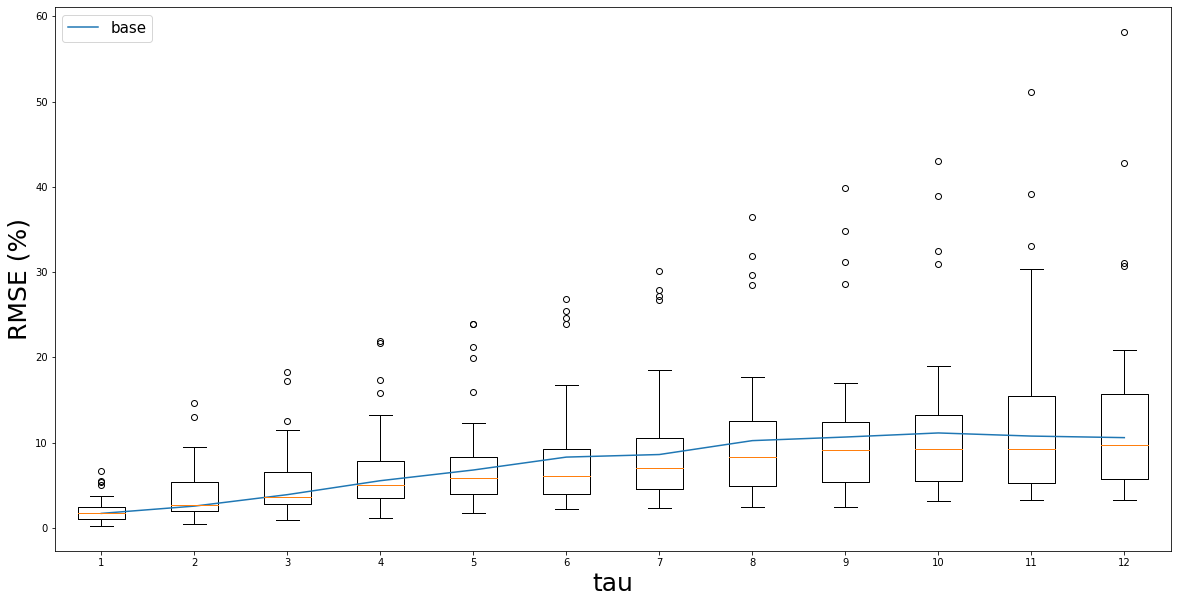

In [36]:
plt.boxplot(np.transpose(base)/N);
plt.plot(taus,np.transpose(corr_soil_mean),label = 'base')
plt.legend(fontsize = 15)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
plt.savefig("boxplot.png")

# BWh

In [12]:
f = 12
step = 1
test_start = 1983
test_end = 2015
#N = 117  #AW
N = 305 #BWh
class_name = 'BWh'
n_components_sst = 57


corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
#corr_soil = np.zeros((12,29))
#pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))

for tau in np.arange(1,12):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/NE/pcmci_{}/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start,test_end,tau))
    #corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/NE/pcmci_{}/base_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start,test_end,tau))

In [13]:
for i in range(11):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.818378421528728 p:0.0006823686571460436
Tau:2 T:3.8349501903330387 p:0.0006529643689392419
Tau:3 T:2.6017713541845224 p:0.0146552250857106
Tau:4 T:3.1858981580839423 p:0.0035287419472052133
Tau:5 T:3.1229506183503086 p:0.004134902757621493
Tau:6 T:2.9612598995612576 p:0.0061810054368678724
Tau:7 T:1.9585151088191062 p:0.06019898981247249
Tau:8 T:1.845715934779537 p:0.07553246870762924
Tau:9 T:1.022199140997121 p:0.3154377146684536
Tau:10 T:2.0132954363001385 p:0.0537867551112822
Tau:11 T:3.221380236155037 p:0.0032256012496437764


In [50]:
q1, q3= np.percentile(data,[25,75])

In [54]:
iqr = q3 - q1

In [55]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [56]:
lower_bound

465.32995287512506

In [68]:
I  = (data > lower_bound) & (data < upper_bound)

In [63]:
I2 = data < upper_bound

In [69]:
I

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [157]:
upper = []
lower = []
upper_base = []
lower_base = []
base = []
corr = []
for tau in np.arange(1,13):
    
    data = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    I  = (data > lower_bound) & (data < upper_bound)
    data = data[I]
    
    MSE = np.mean(data)
    corr.append(MSE)
    n = len(data)
    upper.append(MSE + 1.96 * np.std(data)/np.sqrt(n))
    lower.append(MSE - 1.96 * np.std(data)/np.sqrt(n))
       
    data = np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    I  = (data > lower_bound) & (data < upper_bound)
    data = data[I]
    
    MSE = np.mean(data)
    base.append(MSE)
    n = len(data)
    upper_base.append(MSE + 1.96 * np.std(data)/np.sqrt(n))
    lower_base.append(MSE - 1.96 * np.std(data)/np.sqrt(n))

In [158]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)
corr = np.array(corr)
base = np.array(base)

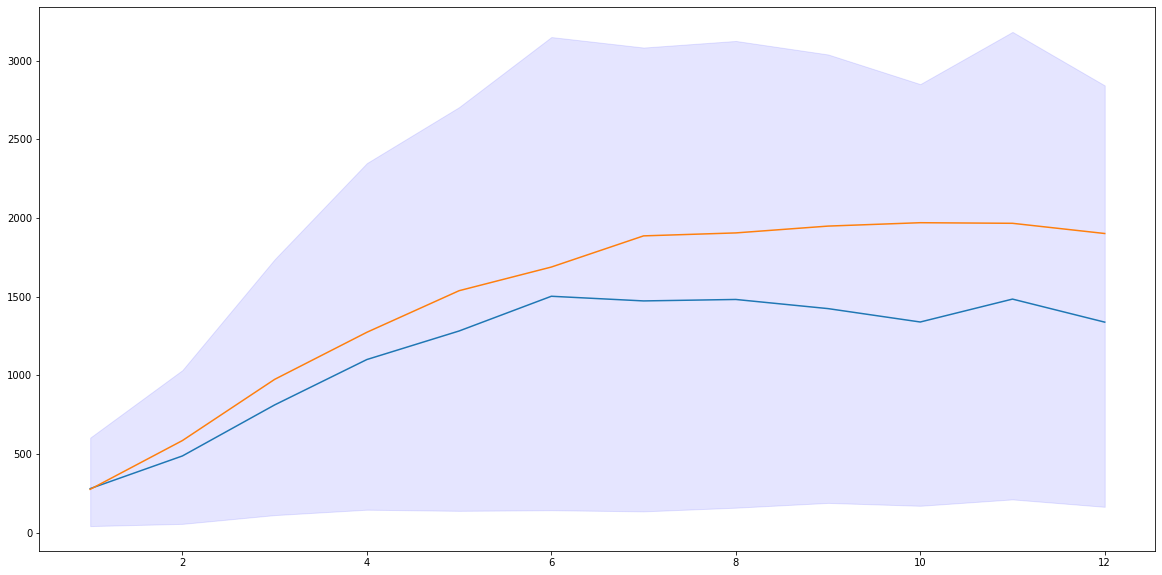

In [159]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,corr)
ax.fill_between(tau, (corr-lower), (corr+upper), color='b', alpha=.1)

ax.plot(tau,base)
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)

In [27]:
lower = np.array(lower)/N
upper = np.array(upper)/N
lower_base = np.array(lower_base)/N
upper_base = np.array(upper_base)/N

In [38]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)

In [39]:
corr_soil

[292.3819076086086,
 577.6923119716764,
 911.4826850468761,
 1148.8910282299837,
 1324.797572384358,
 1465.0156234844626,
 1512.4986885854091,
 1586.8012577842014,
 1545.2502761710625,
 1547.670134364396,
 1552.0673804700991,
 1393.68525973464]

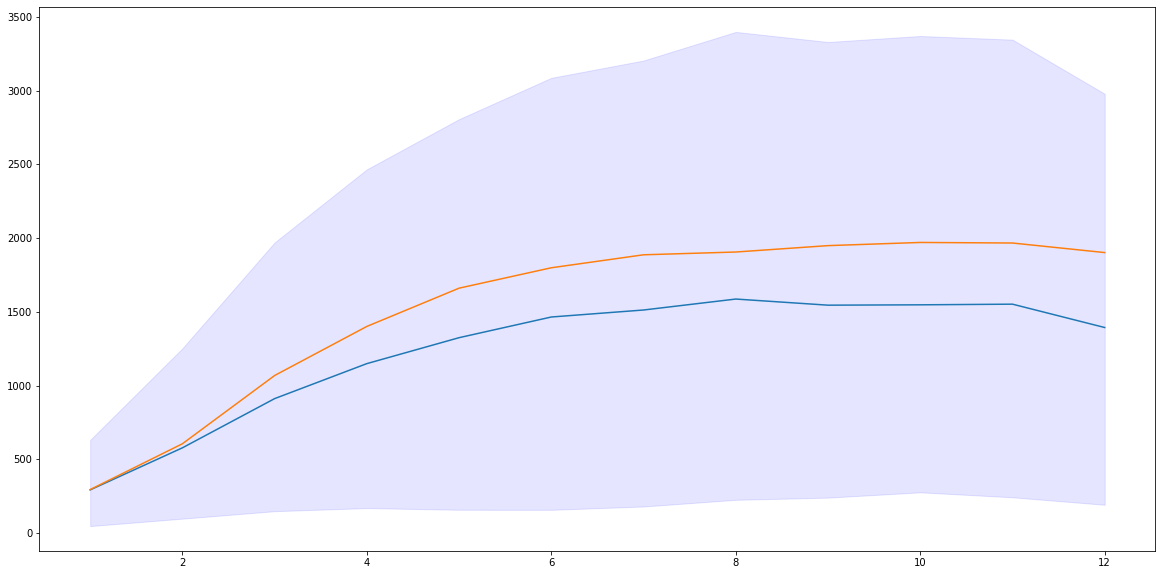

In [45]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,corr_soil)
ax.fill_between(tau, (corr_soil-lower), (corr_soil+upper), color='b', alpha=.1)

ax.plot(tau,base)
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)